<a href="https://colab.research.google.com/github/SakthiShravan/Crop-Recommendation-System/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/5th sem /19cse304-FoDS/ICRS-CASE STUDY/Crop_recommendation (1).csv')
df2=pd.read_csv('/content/drive/MyDrive/5th sem /19cse304-FoDS/ICRS-CASE STUDY/district wise rainfall normal (1).csv')

In [ ]:
df1

,S.NO,N,P,K,temperature,humidity,ph,rainfall,label
0,1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,2,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,3,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,4,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,5,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...,...
2195,2196,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,2197,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,2198,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,2199,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df2

,S.NO,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,2,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,3,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,4,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,5,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,637,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,638,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,639,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,640,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [ ]:
df3=pd.merge(df1,df2)

In [ ]:
df3

,S.NO,N,P,K,temperature,humidity,ph,rainfall,label,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,2,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,3,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,4,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,5,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,637,8,50,21,28.629112,89.114806,6.218924,50.499132,mungbean,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,638,20,40,15,29.573295,88.075055,7.199495,45.044671,mungbean,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,639,36,43,22,27.826843,87.166791,6.389882,58.372498,mungbean,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,640,14,57,15,29.875702,83.147963,6.623438,40.120442,mungbean,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [ ]:
df3.drop(columns='S.NO',inplace=True)

In [ ]:
df3.drop(columns='rainfall',inplace=True)

In [ ]:
df3

,N,P,K,temperature,humidity,ph,label,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,90,42,43,20.879744,82.002744,6.502985,rice,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,85,58,41,21.770462,80.319644,7.038096,rice,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,60,55,44,23.004459,82.320763,7.840207,rice,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,74,35,40,26.491096,80.158363,6.980401,rice,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,78,42,42,20.130175,81.604873,7.628473,rice,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,8,50,21,28.629112,89.114806,6.218924,mungbean,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,20,40,15,29.573295,88.075055,7.199495,mungbean,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,36,43,22,27.826843,87.166791,6.389882,mungbean,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,14,57,15,29.875702,83.147963,6.623438,mungbean,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


**EDA**


In [ ]:
df3.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'label',
       'STATE_UT_NAME', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [ ]:
df3.head()

,N,P,K,temperature,humidity,ph,label,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,90,42,43,20.879744,82.002744,6.502985,rice,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,85,58,41,21.770462,80.319644,7.038096,rice,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,60,55,44,23.004459,82.320763,7.840207,rice,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,74,35,40,26.491096,80.158363,6.980401,rice,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,78,42,42,20.130175,81.604873,7.628473,rice,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [ ]:
df3.tail()

,N,P,K,temperature,humidity,ph,label,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
636,8,50,21,28.629112,89.114806,6.218924,mungbean,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,20,40,15,29.573295,88.075055,7.199495,mungbean,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,36,43,22,27.826843,87.166791,6.389882,mungbean,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,14,57,15,29.875702,83.147963,6.623438,mungbean,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5
640,11,60,23,27.336844,88.502291,7.033013,mungbean,LAKSHADWEEP,LAKSHADWEEP,20.8,14.7,11.8,48.9,171.7,330.2,287.7,217.5,163.1,157.1,117.7,58.8,1600.0,35.5,232.4,998.5,333.6


In [ ]:
df3.sample(5)

,N,P,K,temperature,humidity,ph,label,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
604,22,56,17,29.878881,87.327612,6.890780,mungbean,KARNATAKA,YADGIR,4.4,3.6,5.2,20.5,36.8,116.8,153.0,161.2,179.8,123.4,24.5,5.3,834.5,8.0,62.5,610.8,153.2
631,6,48,24,28.636281,84.614311,6.790736,mungbean,KERALA,MALAPPURAM,1.7,3.9,12.7,86.8,221.3,660.9,792.9,395.3,211.3,290.4,135.1,22.8,2835.1,5.6,320.8,2060.4,448.3
396,30,63,16,23.605066,21.905396,5.525905,kidneybeans,RAJASTHAN,UDAIPUR,2.8,2.0,4.3,2.2,8.2,73.6,207.5,203.7,106.5,15.2,11.1,2.6,639.7,4.8,14.7,591.3,28.9
475,20,72,15,36.004158,56.013344,7.313517,pigeonpeas,GUJARAT,KUTCH,0.6,0.7,1.7,0.2,2.8,45.1,151.5,103.9,60.8,12.5,7.7,1.3,388.8,1.3,4.7,361.3,21.5
343,32,57,18,15.538348,23.755602,5.695423,kidneybeans,HIMACHAL,HAMIRPUR,73.0,61.4,59.1,27.1,42.7,143.3,384.8,391.2,159.6,41.1,13.9,31.0,1428.2,134.4,128.9,1078.9,86.0


In [ ]:
df3.shape


(641, 26)

In [ ]:
df3.dtypes


N                  int64
P                  int64
K                  int64
temperature      float64
humidity         float64
ph               float64
label             object
STATE_UT_NAME     object
DISTRICT          object
JAN              float64
FEB              float64
MAR              float64
APR              float64
MAY              float64
JUN              float64
JUL              float64
AUG              float64
SEP              float64
OCT              float64
NOV              float64
DEC              float64
ANNUAL           float64
Jan-Feb          float64
Mar-May          float64
Jun-Sep          float64
Oct-Dec          float64
dtype: object

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              641 non-null    int64  
 1   P              641 non-null    int64  
 2   K              641 non-null    int64  
 3   temperature    641 non-null    float64
 4   humidity       641 non-null    float64
 5   ph             641 non-null    float64
 6   label          641 non-null    object 
 7   STATE_UT_NAME  641 non-null    object 
 8   DISTRICT       641 non-null    object 
 9   JAN            641 non-null    float64
 10  FEB            641 non-null    float64
 11  MAR            641 non-null    float64
 12  APR            641 non-null    float64
 13  MAY            641 non-null    float64
 14  JUN            641 non-null    float64
 15  JUL            641 non-null    float64
 16  AUG            641 non-null    float64
 17  SEP            641 non-null    float64
 18  OCT       

In [ ]:
df3.describe()

,N,P,K,temperature,humidity,ph,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000
mean,42.057722,57.327613,32.531981,23.820950,50.249480,6.421957,18.355070,20.984399,30.034789,45.543214,81.535101,196.007332,326.033697,291.152262,194.609048,90.446334,34.117473,18.150858,1346.969579,39.339470,157.113105,1007.80234,142.714665
std,28.132412,12.375581,21.784728,4.685745,24.725196,1.082213,21.082806,27.729596,45.451082,71.556279,111.960390,196.556284,221.364643,152.647325,99.830540,74.990685,59.371274,32.711009,838.878874,47.212773,213.445888,629.33261,148.951752
min,0.000000,35.000000,15.000000,15.330426,14.258040,3.504752,0.000000,0.000000,0.000000,0.000000,0.900000,3.800000,11.600000,14.100000,8.600000,3.100000,1.200000,0.000000,94.600000,0.000000,1.500000,39.60000,5.600000
25%,21.000000,48.000000,19.000000,19.727025,22.426110,5.721667,6.900000,7.000000,7.000000,5.000000,12.100000,68.800000,206.400000,194.600000,128.800000,34.300000,6.600000,5.300000,830.400000,14.700000,27.800000,625.40000,51.600000
50%,34.000000,57.000000,22.000000,23.453790,54.650300,6.276004,13.300000,12.300000,12.700000,15.100000,33.900000,131.900000,293.700000,284.800000,181.300000,62.600000,12.900000,7.900000,1116.200000,27.700000,67.200000,896.60000,86.700000
75%,67.000000,67.000000,38.000000,27.317912,71.509060,7.038096,19.200000,24.100000,33.200000,48.300000,91.900000,226.600000,374.800000,358.100000,234.100000,130.200000,32.300000,14.900000,1530.900000,41.100000,172.400000,1193.80000,175.200000
max,100.000000,80.000000,85.000000,36.977944,89.715033,9.935091,144.500000,229.600000,367.900000,554.400000,733.700000,1476.200000,1820.900000,1522.100000,826.300000,517.700000,475.100000,297.700000,7229.300000,335.300000,1256.500000,5228.00000,1048.500000


In [ ]:
df3['label'].value_counts()

pigeonpeas     100
maize          100
mothbeans      100
chickpea       100
rice           100
kidneybeans    100
mungbean        41
Name: label, dtype: int64

In [ ]:
df3['STATE_UT_NAME'].unique()

array(['ANDAMAN And NICOBAR ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM',
       'MEGHALAYA', 'MANIPUR', 'MIZORAM', 'NAGALAND', 'TRIPURA',
       'WEST BENGAL', 'SIKKIM', 'ORISSA', 'JHARKHAND', 'BIHAR',
       'UTTAR PRADESH', 'UTTARANCHAL', 'HARYANA', 'CHANDIGARH', 'DELHI',
       'PUNJAB', 'HIMACHAL', 'JAMMU AND KASHMIR', 'RAJASTHAN',
       'MADHYA PRADESH', 'GUJARAT', 'DADAR NAGAR HAVELI', 'DAMAN AND DUI',
       'MAHARASHTRA', 'GOA', 'CHATISGARH', 'ANDHRA PRADESH', 'TAMIL NADU',
       'PONDICHERRY', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [ ]:
df3.isnull().sum()

N                0
P                0
K                0
temperature      0
humidity         0
ph               0
label            0
STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64

In [ ]:
df3.duplicated().sum()

0

In [ ]:
counts=df3.groupby('STATE_UT_NAME').size()
counts

STATE_UT_NAME
ANDAMAN And NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHATISGARH                     18
DADAR NAGAR HAVELI              1
DAMAN AND DUI                   2
DELHI                           9
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL                       12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         9
NAGALAND                       11
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33


In [ ]:
print('The average Rainfall in Jan-Feb is: ',df3['Jan-Feb'].mean())


The average Rainfall in Jan-Feb is:  39.33946957878318


In [ ]:
rf_var=df3['Jun-Sep'].var()
rf_std=df3['Jun-Sep'].std()
rf_mean=df3['Jun-Sep'].mean()
rf_median=df3['Jun-Sep'].median()
rf_mode=df3['Jun-Sep'].mode()
print(' Var :',rf_var,'\n STD :',rf_std,'\n Mean :',rf_mean,'\n Median :',rf_median,'\n Mode :',rf_mode[0])

 Var : 396059.53376014065 
 STD : 629.3326098019558 
 Mean : 1007.8023400936041 
 Median : 896.6 
 Mode : 636.2


In [ ]:
n_var=df3['N'].var()
n_std=df3['N'].std()
n_mean=df3['N'].mean()
n_median=df3['N'].median()
n_mode=df3['N'].mode()
print(' Var :',n_var,'\n STD :',n_std,'\n Mean :',n_mean,'\n Median :',n_median,'\n Mode :',n_mode[0])

 Var : 791.4326004290172 
 STD : 28.132411919865973 
 Mean : 42.05772230889236 
 Median : 34.0 
 Mode : 27


In [ ]:
t_var=df3['temperature'].var()
t_std=df3['temperature'].std()
t_mean=df3['temperature'].mean()
t_median=df3['temperature'].median()
t_mode=df3['temperature'].mode()
print(' Var :',t_var,'\n STD :',t_std,'\n Mean :',t_mean,'\n Median :',t_median,'\n Mode :',t_mode[0])

 Var : 21.95620685266696 
 STD : 4.685745069107682 
 Mean : 23.820950441232444 
 Median : 23.45379018 
 Mode : 15.33042636


In [ ]:
h_var=df3['humidity'].var()
h_std=df3['humidity'].std()
h_mean=df3['humidity'].mean()
h_median=df3['humidity'].median()
h_mode=df3['humidity'].mode()
print(' Var :',h_var,'\n STD :',h_std,'\n Mean :',h_mean,'\n Median :',h_median,'\n Mode :',h_mode[0])

 Var : 611.3353155655873 
 STD : 24.72519596617158 
 Mean : 50.24947989878322 
 Median : 54.65030015 
 Mode : 14.25803981


**EDA & Visualization**

In [ ]:
df3.nlargest(6,'temperature')

,N,P,K,temperature,humidity,ph,label,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
418,26,67,24,36.977944,37.739929,5.642813,pigeonpeas,MADHYA PRADESH,RAISEN,10.2,9.4,6.4,1.8,6.4,128.9,373.1,405.9,206.9,32.9,9.9,8.7,1200.5,19.6,14.6,1114.8,51.5
401,40,59,23,36.891637,62.731782,5.269085,pigeonpeas,RAJASTHAN,KARAULI,9.1,7.7,3.5,2.4,9.9,50.8,220.5,269.8,96.3,17.0,5.4,3.8,696.2,16.8,15.8,637.4,26.2
494,17,64,18,36.750875,58.257991,6.079385,pigeonpeas,MAHARASHTRA,NASHIK,1.2,0.5,1.0,4.7,15.1,154.9,315.0,259.0,183.3,68.0,22.3,4.6,1029.6,1.7,20.8,912.2,94.9
400,3,72,24,36.512684,57.928872,6.031608,pigeonpeas,RAJASTHAN,RAJSAMAND,4.0,2.2,3.7,2.6,12.3,68.1,176.8,177.6,83.5,13.7,6.9,3.1,554.5,6.2,18.6,506.0,23.7
477,0,70,21,36.300497,56.030213,4.672437,pigeonpeas,GUJARAT,SURENDRANAGAR,0.2,0.0,0.1,0.3,4.7,99.7,168.8,148.1,83.2,17.5,11.3,0.7,534.6,0.2,5.1,499.8,29.5
455,37,77,17,36.209705,31.945506,5.617123,pigeonpeas,GUJARAT,BARODA,1.2,0.0,0.5,0.8,4.6,138.8,332.5,306.3,165.2,25.9,14.0,2.4,992.2,1.2,5.9,942.8,42.3


In [ ]:
df3.loc[(df3.ANNUAL>153) & (df3.ANNUAL<200)]

,N,P,K,temperature,humidity,ph,label,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
374,12,61,19,19.331626,24.13995,5.655727,kidneybeans,RAJASTHAN,JAISALMER,1.7,2.9,2.2,3.8,6.6,19.4,59.3,56.9,22.8,3.1,1.5,1.0,181.2,4.6,12.6,158.4,5.6


In [ ]:
df3.at[10,'STATE_UT_NAME']

'ARUNACHAL PRADESH'

In [ ]:
df3.loc[(df3['DISTRICT']=='COIMBATORE')]

,N,P,K,temperature,humidity,ph,label,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
561,35,51,17,28.799292,49.842134,3.558823,mothbeans,TAMIL NADU,COIMBATORE,8.1,12.2,17.2,53.4,79.7,32.9,47.2,40.6,69.1,151.9,129.6,47.4,689.3,20.3,150.3,189.8,328.9


**VISUALIZATION**

1. Dist Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


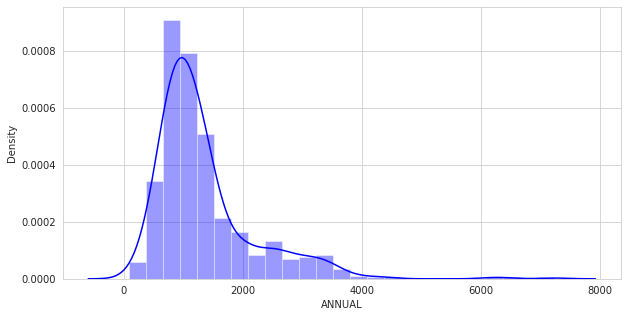

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(df3['ANNUAL'], kde = True, color ='blue', bins = 25)

2. Box plot

Text(0.5, 1.0, 'HUMIDITY OVER INDIA')

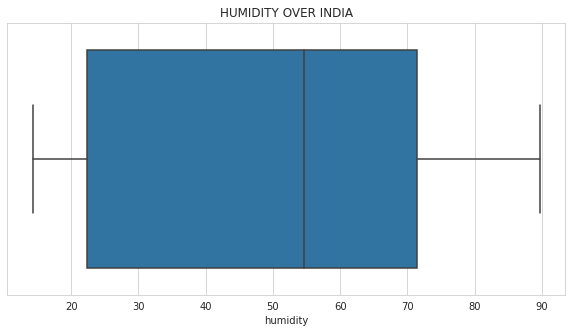

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df3.humidity).set_title("HUMIDITY OVER INDIA")

Text(0.5, 1.0, 'TEMPERATURE OVER INDIA')

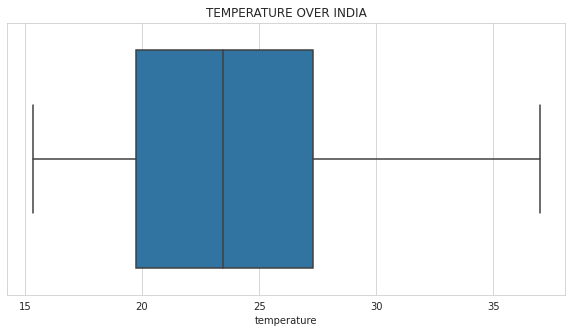

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df3.temperature).set_title("TEMPERATURE OVER INDIA")

3. Bar plot

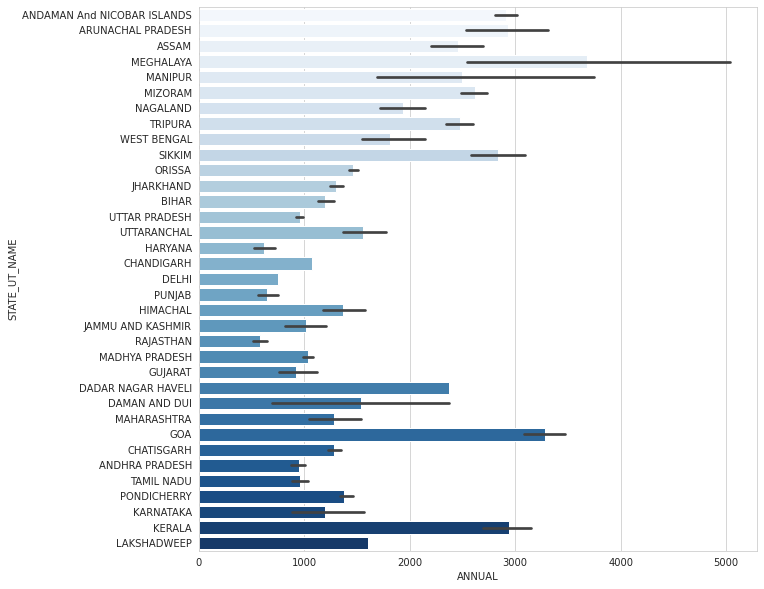

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='ANNUAL', y='STATE_UT_NAME',data=df3,palette="Blues")
plt.show()

4. Violin plot

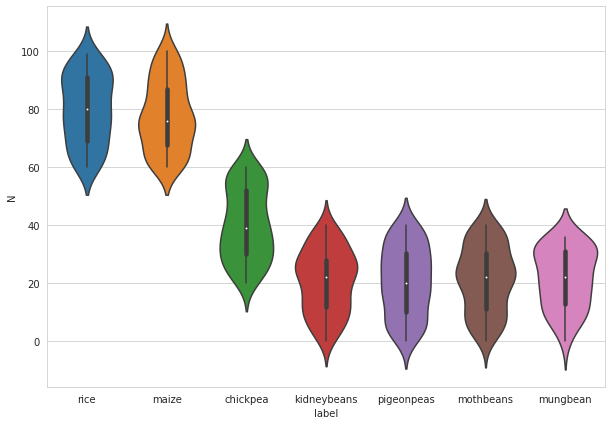

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(x='label', y='N',data=df3)
plt.show()

5. Scatter Plot


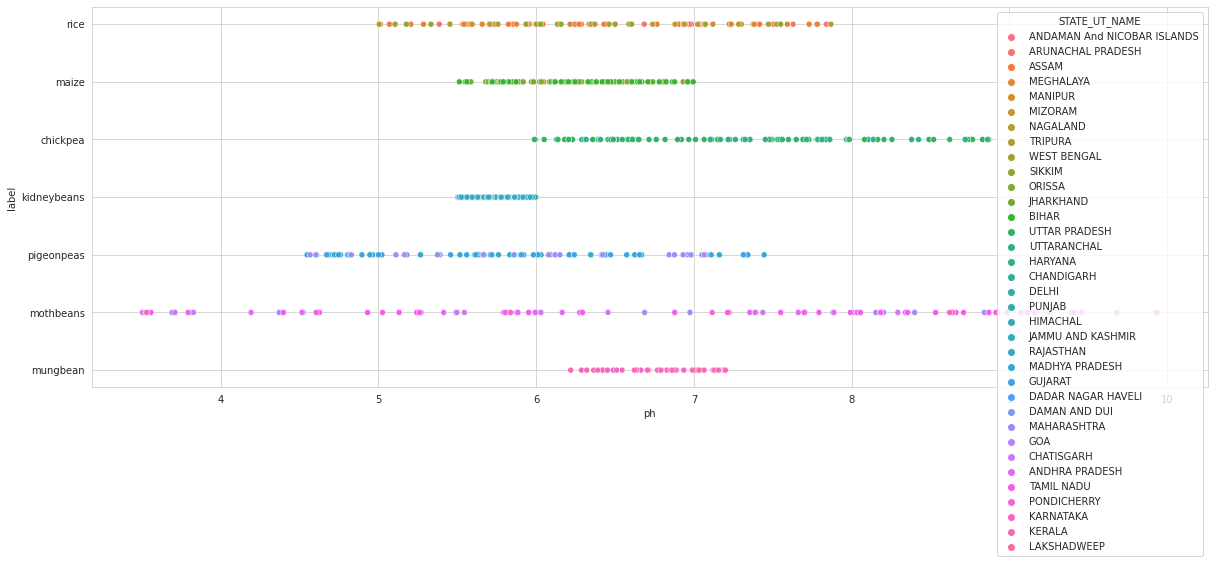

In [ ]:
plt.figure(figsize=(20,7))
sns.scatterplot(x='ph', y='label', hue='STATE_UT_NAME', data=df3)
plt.show()

6.Pie chart


([<matplotlib.patches.Wedge at 0x7ff28d75ddd0>,
 [Text(0.9705101876132436, 0.5177933716637428, '3.0'),
  Text(0.11033345090134715, 1.094452616430789, '5.0'),
  Text(-0.847633364634847, 0.7010832184254654, '1.0'),
  Text(-1.0543308881785227, -0.31366602977161495, '0.0'),
  Text(-0.3265602171756734, -1.050408694060639, '2.0'),
  Text(0.6906453361553149, -0.8561594592404573, '6.0'),
  Text(1.0778664431718885, -0.21955393570597267, '4.0')],
 [Text(0.5293691932435873, 0.2824327481802233, '15.60%'),
  Text(0.06018188230982571, 0.596974154416794, '15.60%'),
  Text(-0.46234547161900735, 0.38240902823207196, '15.60%'),
  Text(-0.5750895753701032, -0.17109056169360812, '15.60%'),
  Text(-0.1781237548230946, -0.5729501967603485, '15.60%'),
  Text(0.376715637902899, -0.46699606867661303, '15.60%'),
  Text(0.58792715082103, -0.11975669220325781, '6.40%')])

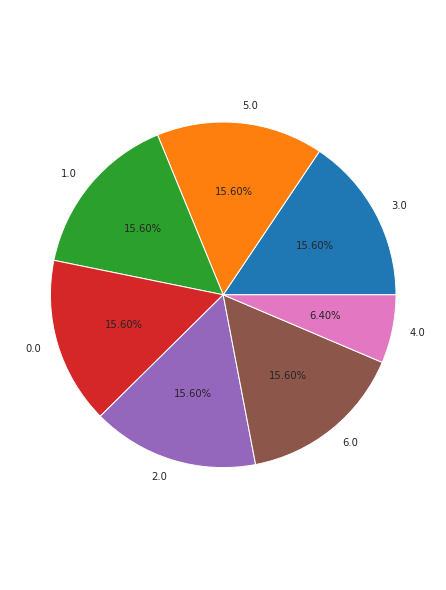

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
ax.axis('equal')
data=[100,100,100,100,100,100,41]
diff=('3.0','5.0','1.0','0.0','2.0','6.0','4.0')
ax.pie(data, labels =diff,autopct='%1.2f%%')

7. Pair plot

In [ ]:
sns.pairplot(data=df3,hue='label')
plt.show()

8. Strip Plots based on season

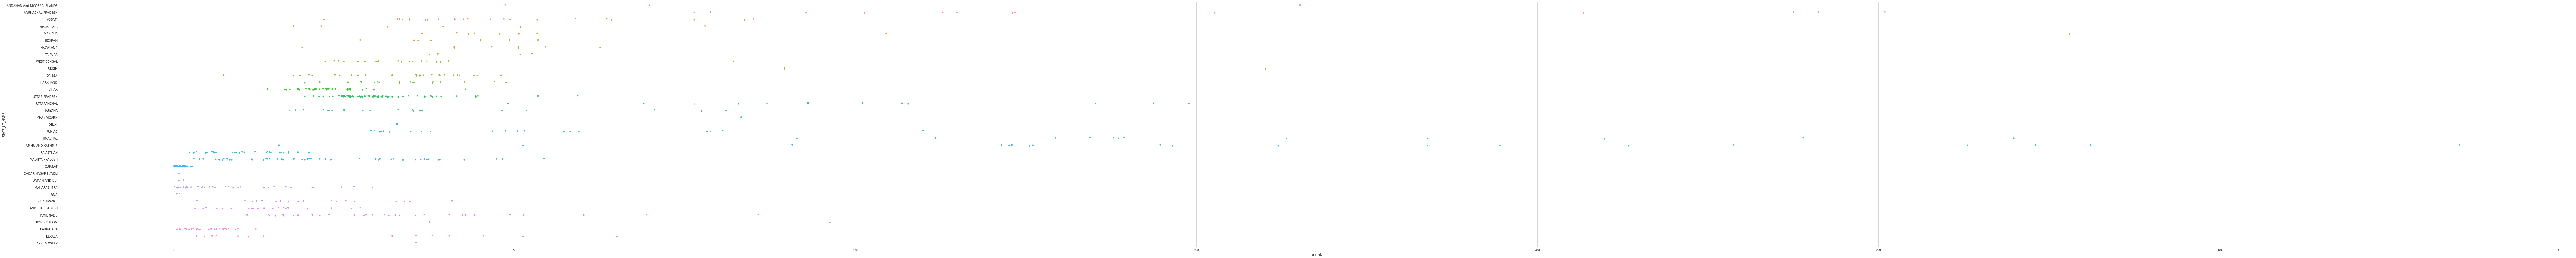

In [ ]:
plt.figure(figsize=(150,15))
sns.stripplot(x=df3['Jan-Feb'],y=df3['STATE_UT_NAME'],data=df3)
plt.show()

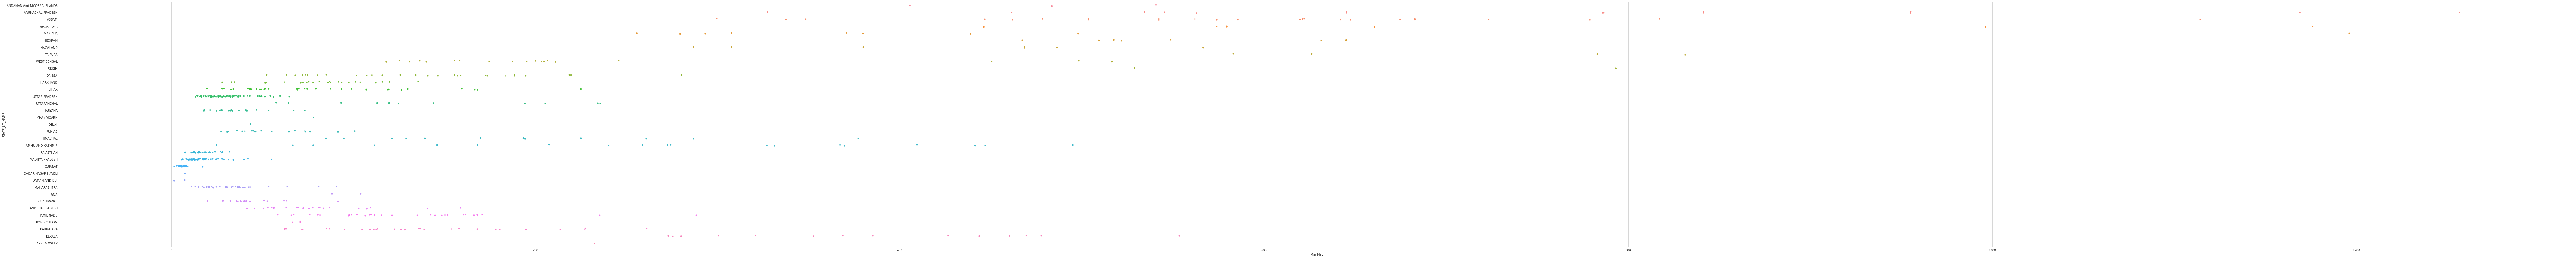

In [ ]:
plt.figure(figsize=(150,15))
sns.stripplot(x=df3['Mar-May'],y=df3['STATE_UT_NAME'],data=df3)
plt.show()

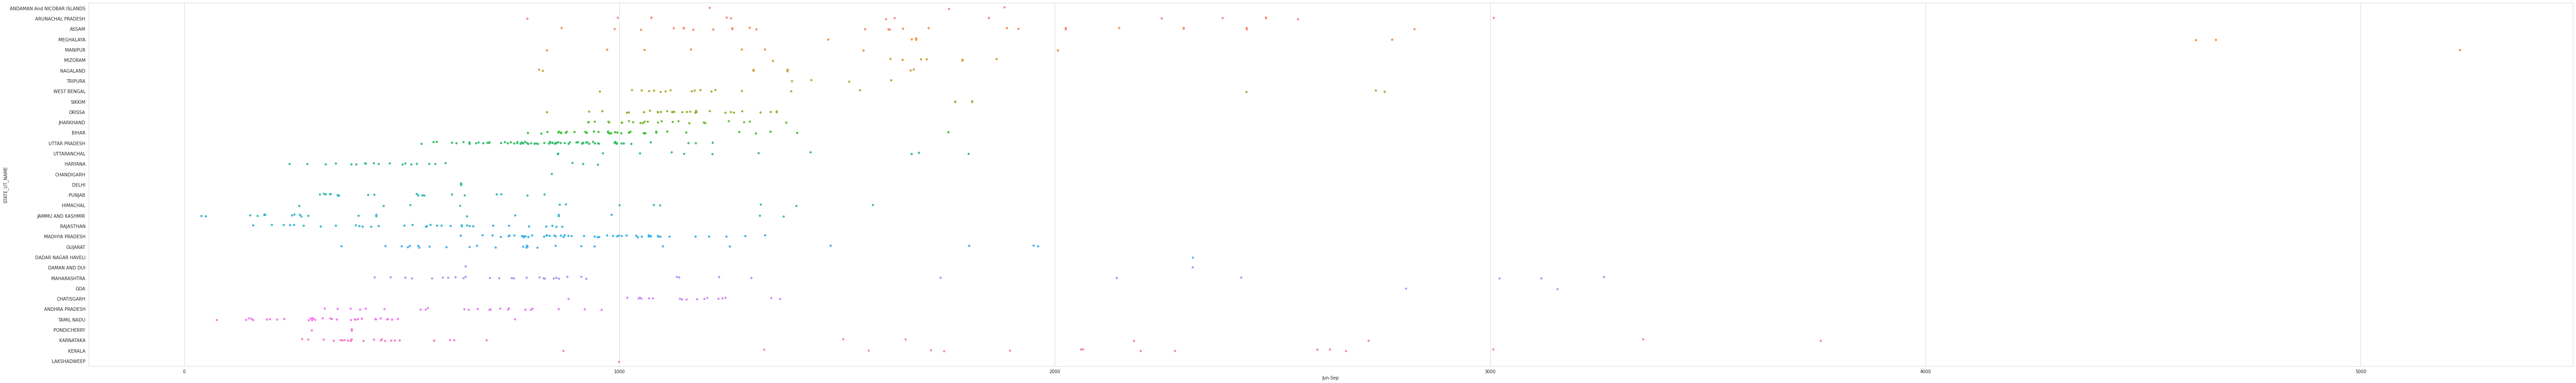

In [ ]:
plt.figure(figsize=(100,15))
sns.stripplot(x=df3['Jun-Sep'],y=df3['STATE_UT_NAME'],data=df3)
plt.show()

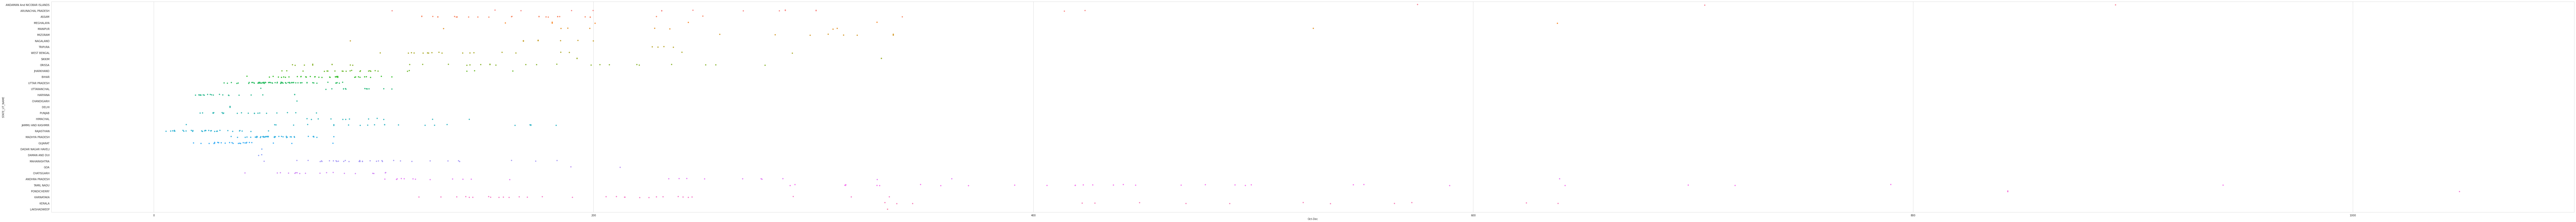

In [ ]:
plt.figure(figsize=(175,15))
sns.stripplot(x=df3['Oct-Dec'],y=df3['STATE_UT_NAME'],data=df3)
plt.show()

8. Strip Plots based on season

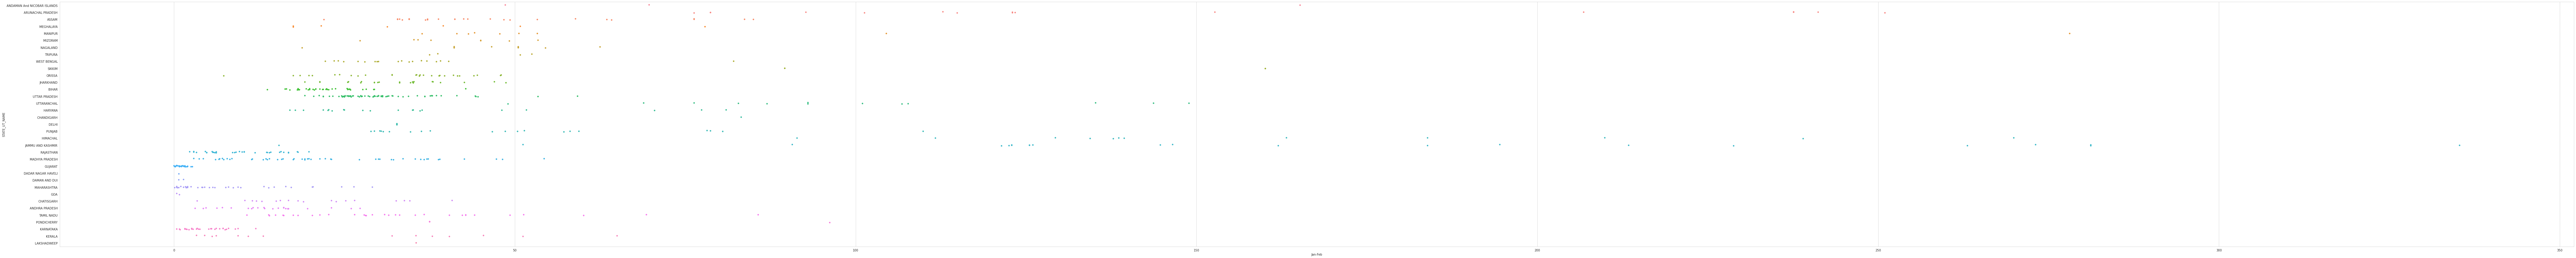

In [ ]:
plt.figure(figsize=(150,15))
sns.stripplot(x=df3['Jan-Feb'],y=df3['STATE_UT_NAME'],data=df3)
plt.show()

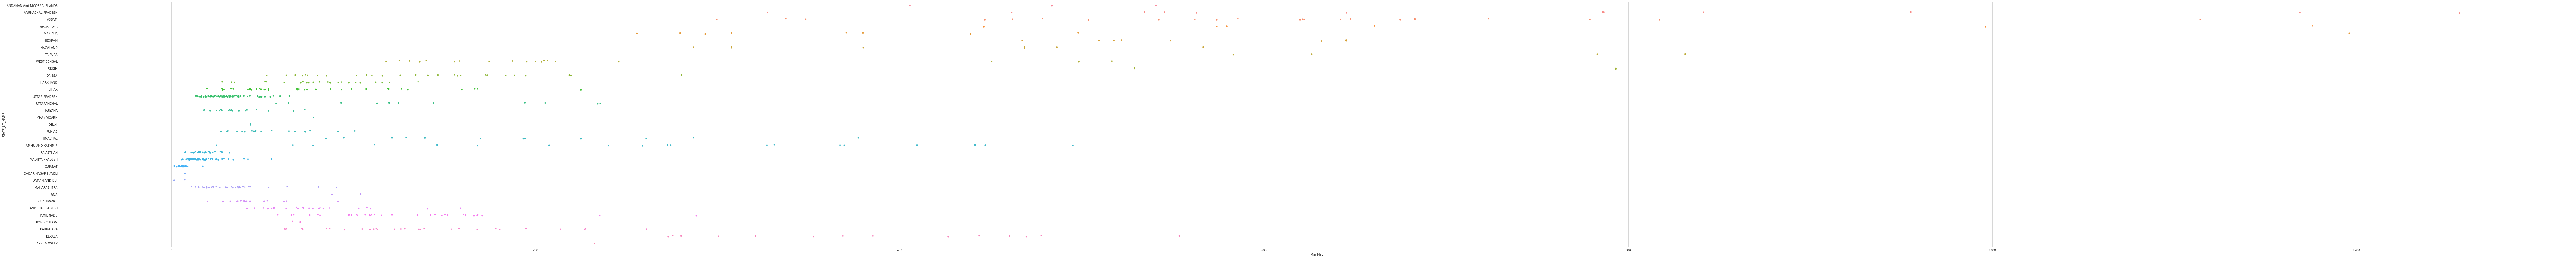

In [ ]:
plt.figure(figsize=(150,15))
sns.stripplot(x=df3['Mar-May'],y=df3['STATE_UT_NAME'],data=df3)
plt.show()

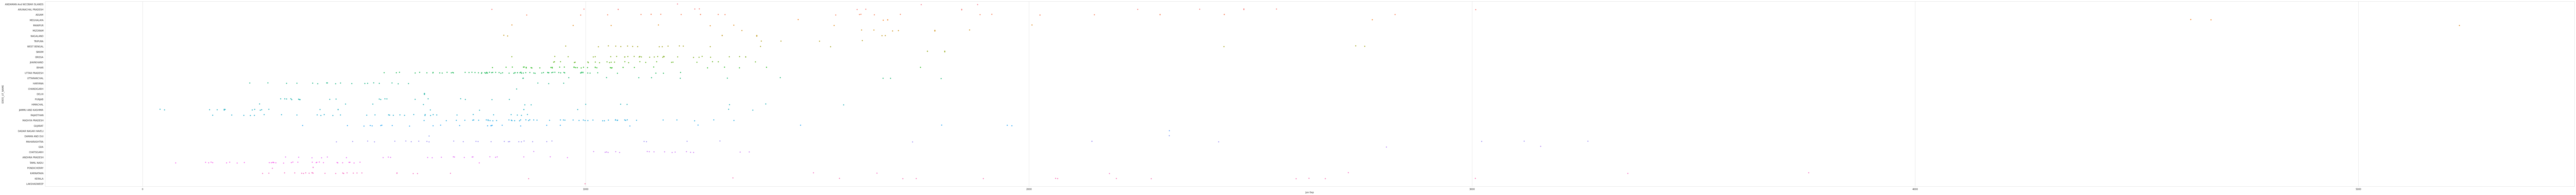

In [ ]:
plt.figure(figsize=(200,15))
sns.stripplot(x=df3['Jun-Sep'],y=df3['STATE_UT_NAME'],data=df3)
plt.show()

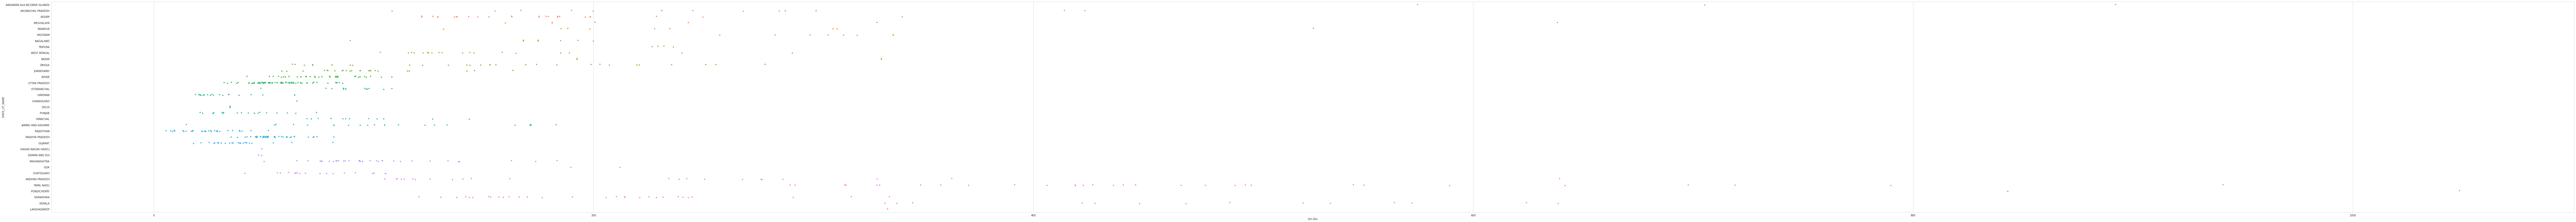

In [ ]:
plt.figure(figsize=(175,15))
sns.stripplot(x=df3['Oct-Dec'],y=df3['STATE_UT_NAME'],data=df3)
plt.show()

**Hypothesis Testing**:



In [ ]:
a=pd.read_csv('/content/drive/MyDrive/5th sem /19cse304-FoDS/ICRS-CASE STUDY/Crop_recommendation (1).csv')
b=pd.read_csv('/content/drive/MyDrive/5th sem /19cse304-FoDS/ICRS-CASE STUDY/district wise rainfall normal (1).csv')

In [ ]:
hp_df=pd.merge(a,b)

In [ ]:
hp_df

,S.NO,N,P,K,temperature,humidity,ph,rainfall,label,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,2,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,3,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,4,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,5,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,637,8,50,21,28.629112,89.114806,6.218924,50.499132,mungbean,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,638,20,40,15,29.573295,88.075055,7.199495,45.044671,mungbean,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,639,36,43,22,27.826843,87.166791,6.389882,58.372498,mungbean,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,640,14,57,15,29.875702,83.147963,6.623438,40.120442,mungbean,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [ ]:
hp_df.drop(columns='S.NO',inplace=True)

In [ ]:
hp_df.drop(columns='rainfall',inplace=True)

In [ ]:
hp_df

,N,P,K,temperature,humidity,ph,label,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,90,42,43,20.879744,82.002744,6.502985,rice,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,85,58,41,21.770462,80.319644,7.038096,rice,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,60,55,44,23.004459,82.320763,7.840207,rice,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,74,35,40,26.491096,80.158363,6.980401,rice,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,78,42,42,20.130175,81.604873,7.628473,rice,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,8,50,21,28.629112,89.114806,6.218924,mungbean,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,20,40,15,29.573295,88.075055,7.199495,mungbean,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,36,43,22,27.826843,87.166791,6.389882,mungbean,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,14,57,15,29.875702,83.147963,6.623438,mungbean,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [ ]:
mu=hp_df['ph'].mean()
mu

6.4219568137971885

In [ ]:
xbar=hp_df.head(100)['ph'].mean()
xbar

6.425470922139999

In [ ]:
sigma=np.std(hp_df['ph'])
sigma

1.0813687610596905

In [ ]:
import scipy.stats as st

In [ ]:
z_critical = abs(st.norm.ppf(0.05))
z_critical

1.6448536269514729

In [ ]:
n=100

In [ ]:
z = (xbar-mu) / (sigma/np.sqrt(n))
z

0.03249685462863413

In [ ]:
def check_hypothesis():
    # H0: mu=6.4219568137971885 ; 
    # Ha: mu<6.4219568137971885 ; 

    n = 100
    xbar = 6.425470922139999
    mu = 6.4219568137971885
    sigma = 1.0813687610596905
    alpha = 0.05

    z = 0.03249685462863413
    z_critical = 1.6448536269514729
    
    if(z < z_critical): 
        print('Accept Null Hypothesis')
    else:
        print('Reject Null Hypothesis')
        

In [ ]:
check_hypothesis()

Accept Null Hypothesis


Pre Processing

In [ ]:
df3.isna().sum()

N                0
P                0
K                0
temperature      0
humidity         0
ph               0
label            0
STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64

In [ ]:
df3.duplicated().sum()

0

In [ ]:
df3=df3.drop(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL'],axis=1)

In [ ]:
df3

,N,P,K,temperature,humidity,ph,label,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,90,42,43,20.879744,82.002744,6.502985,rice,ANDAMAN And NICOBAR ISLANDS,NICOBAR,165.2,540.7,1207.2,892.1
1,85,58,41,21.770462,80.319644,7.038096,rice,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,69.7,483.5,1757.2,705.3
2,60,55,44,23.004459,82.320763,7.840207,rice,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,48.6,405.6,1884.4,574.7
3,74,35,40,26.491096,80.158363,6.980401,rice,ARUNACHAL PRADESH,LOHIT,123.0,841.3,1848.5,231.0
4,78,42,42,20.130175,81.604873,7.628473,rice,ARUNACHAL PRADESH,EAST SIANG,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,8,50,21,28.629112,89.114806,6.218924,mungbean,KERALA,IDUKKI,35.5,426.6,2276.2,564.2
637,20,40,15,29.573295,88.075055,7.199495,mungbean,KERALA,KASARGOD,3.3,272.9,3007.5,337.9
638,36,43,22,27.826843,87.166791,6.389882,mungbean,KERALA,PATHANAMTHITTA,65.0,553.5,1715.7,624.2
639,14,57,15,29.875702,83.147963,6.623438,mungbean,KERALA,WAYANAD,13.1,275.4,2632.1,332.5


In [ ]:
pd.crosstab(df3.label,df3.STATE_UT_NAME)

STATE_UT_NAME,ANDAMAN And NICOBAR ISLANDS,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHATISGARH,DADAR NAGAR HAVELI,DAMAN AND DUI,DELHI,GOA,GUJARAT,HARYANA,HIMACHAL,JAMMU AND KASHMIR,JHARKHAND,KARNATAKA,KERALA,LAKSHADWEEP,MADHYA PRADESH,MAHARASHTRA,MANIPUR,MEGHALAYA,MIZORAM,NAGALAND,ORISSA,PONDICHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARANCHAL,WEST BENGAL
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
chickpea,0,0,0,0,1,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,13,0
kidneybeans,0,0,0,0,0,1,0,0,0,9,0,0,6,12,22,0,0,0,0,0,0,0,0,0,0,0,0,20,30,0,0,0,0,0,0
maize,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,9
mothbeans,0,23,0,0,0,0,18,0,0,0,0,0,0,0,0,0,4,0,0,0,19,0,0,0,0,0,4,0,0,0,32,0,0,0,0
mungbean,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
pigeonpeas,0,0,0,0,0,0,0,1,2,0,2,26,0,0,0,0,0,0,0,50,16,0,0,0,0,0,0,0,3,0,0,0,0,0,0
rice,3,0,16,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,7,9,11,0,0,0,0,4,0,4,0,0,10


In [ ]:
g=df3.groupby('label')

In [ ]:
g.groups

{'chickpea': [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299], 'kidneybeans': [300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393,

In [ ]:
g.first()

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
label,,,,,,,,,,,,
chickpea,40,72,77,17.024985,16.988612,7.485996,BIHAR,SAHARSA,17.0,159.5,1408.1,108.3
kidneybeans,13,60,25,17.136928,20.595417,5.685972,HARYANA,REWARI,17.8,18.1,435.8,20.5
maize,71,54,16,22.613600,63.690706,5.749914,WEST BENGAL,HOWRAH,37.1,211.0,1211.4,140.5
mothbeans,3,49,18,27.910952,64.709306,3.692864,MAHARASHTRA,AURANGABAD,4.1,23.0,594.2,94.9
mungbean,19,55,20,27.433294,87.805077,7.185301,KARNATAKA,BIDAR,12.0,63.2,694.9,120.6
pigeonpeas,3,72,24,36.512684,57.928872,6.031608,RAJASTHAN,RAJSAMAND,6.2,18.6,506.0,23.7
rice,90,42,43,20.879744,82.002744,6.502985,ANDAMAN And NICOBAR ISLANDS,NICOBAR,165.2,540.7,1207.2,892.1


In [ ]:
g1=df3.groupby(['label','STATE_UT_NAME']).count()

In [ ]:
g1

N   P   K  ...  Mar-May  Jun-Sep  Oct-Dec
label       STATE_UT_NAME                            ...                           
chickpea    BIHAR                         1   1   1  ...        1        1        1
            HARYANA                      15  15  15  ...       15       15       15
            UTTAR PRADESH                71  71  71  ...       71       71       71
            UTTARANCHAL                  13  13  13  ...       13       13       13
kidneybeans CHANDIGARH                    1   1   1  ...        1        1        1
            DELHI                         9   9   9  ...        9        9        9
            HARYANA                       6   6   6  ...        6        6        6
            HIMACHAL                     12  12  12  ...       12       12       12
            JAMMU AND KASHMIR            22  22  22  ...       22       22       22
            PUNJAB                       20  20  20  ...       20       20       20
            RAJASTHAN                    30  30  30  ...       30       30       30
maize       BIHAR                        37  37  37  ...       37       37       37
            JHARKHAND                    24  24  24  ...       24       24       24
            ORISSA                       30  30  30  ...       30       30       30
            WEST BENGAL                   9   9   9  ...        9        9        9
mothbeans   ANDHRA PRADESH               23  23  23  ...       23       23       23
            CHATISGARH                   18  18  18  ...       18       18       18
            KARNATAKA                     4   4   4  ...        4        4        4
            MAHARASHTRA                  19  19  19  ...       19       19       19
            PONDICHERRY                   4   4   4  ...        4        4        4
            TAMIL NADU                   32  32  32  ...       32       32       32
mungbean    KARNATAKA                    26  26  26  ...       26       26       26
            KERALA                       14  14  14  ...       14       14       14
            LAKSHADWEEP                   1   1   1  ...        1        1        1
pigeonpeas  DADAR NAGAR HAVELI            1   1   1  ...        1        1        1
            DAMAN AND DUI                 2   2   2  ...        2        2        2
            GOA                           2   2   2  ...        2        2        2
            GUJARAT                      26  26  26  ...       26       26       26
            MADHYA PRADESH               50  50  50  ...       50       50       50
            MAHARASHTRA                  16  16  16  ...       16       16       16
            RAJASTHAN                     3   3   3  ...        3        3        3
rice        ANDAMAN And NICOBAR ISLANDS   3   3   3  ...        3        3        3
            ARUNACHAL PRADESH            16  16  16  ...       16       16       16
            ASSAM                        27  27  27  ...       27       27       27
            MANIPUR                       9   9   9  ...        9        9        9
            MEGHALAYA                     7   7   7  ...        7        7        7
            MIZORAM                       9   9   9  ...        9        9        9
            NAGALAND                     11  11  11  ...       11       11       11
            SIKKIM                        4   4   4  ...        4        4        4
            TRIPURA                       4   4   4  ...        4        4        4
            WEST BENGAL                  10  10  10  ...       10       10       10

[41 rows x 11 columns]

In [ ]:
g1.sort_values('N')

N   P   K  ...  Mar-May  Jun-Sep  Oct-Dec
label       STATE_UT_NAME                            ...                           
chickpea    BIHAR                         1   1   1  ...        1        1        1
mungbean    LAKSHADWEEP                   1   1   1  ...        1        1        1
pigeonpeas  DADAR NAGAR HAVELI            1   1   1  ...        1        1        1
kidneybeans CHANDIGARH                    1   1   1  ...        1        1        1
pigeonpeas  DAMAN AND DUI                 2   2   2  ...        2        2        2
            GOA                           2   2   2  ...        2        2        2
            RAJASTHAN                     3   3   3  ...        3        3        3
rice        ANDAMAN And NICOBAR ISLANDS   3   3   3  ...        3        3        3
mothbeans   PONDICHERRY                   4   4   4  ...        4        4        4
rice        SIKKIM                        4   4   4  ...        4        4        4
            TRIPURA                       4   4   4  ...        4        4        4
mothbeans   KARNATAKA                     4   4   4  ...        4        4        4
kidneybeans HARYANA                       6   6   6  ...        6        6        6
rice        MEGHALAYA                     7   7   7  ...        7        7        7
kidneybeans DELHI                         9   9   9  ...        9        9        9
rice        MIZORAM                       9   9   9  ...        9        9        9
maize       WEST BENGAL                   9   9   9  ...        9        9        9
rice        MANIPUR                       9   9   9  ...        9        9        9
            WEST BENGAL                  10  10  10  ...       10       10       10
            NAGALAND                     11  11  11  ...       11       11       11
kidneybeans HIMACHAL                     12  12  12  ...       12       12       12
chickpea    UTTARANCHAL                  13  13  13  ...       13       13       13
mungbean    KERALA                       14  14  14  ...       14       14       14
chickpea    HARYANA                      15  15  15  ...       15       15       15
pigeonpeas  MAHARASHTRA                  16  16  16  ...       16       16       16
rice        ARUNACHAL PRADESH            16  16  16  ...       16       16       16
mothbeans   CHATISGARH                   18  18  18  ...       18       18       18
            MAHARASHTRA                  19  19  19  ...       19       19       19
kidneybeans PUNJAB                       20  20  20  ...       20       20       20
            JAMMU AND KASHMIR            22  22  22  ...       22       22       22
mothbeans   ANDHRA PRADESH               23  23  23  ...       23       23       23
maize       JHARKHAND                    24  24  24  ...       24       24       24
pigeonpeas  GUJARAT                      26  26  26  ...       26       26       26
mungbean    KARNATAKA                    26  26  26  ...       26       26       26
rice        ASSAM                        27  27  27  ...       27       27       27
maize       ORISSA                       30  30  30  ...       30       30       30
kidneybeans RAJASTHAN                    30  30  30  ...       30       30       30
mothbeans   TAMIL NADU                   32  32  32  ...       32       32       32
maize       BIHAR                        37  37  37  ...       37       37       37
pigeonpeas  MADHYA PRADESH               50  50  50  ...       50       50       50
chickpea    UTTAR PRADESH                71  71  71  ...       71       71       71

[41 rows x 11 columns]

In [ ]:
target=df3['label']
df3=df3.drop('label',axis=1)

**Outlier** **Detection**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


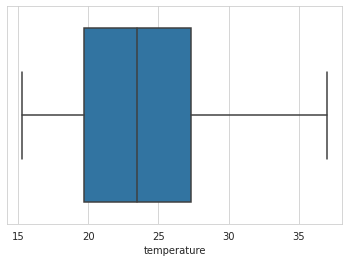

In [ ]:
sns.boxplot(df3['temperature'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


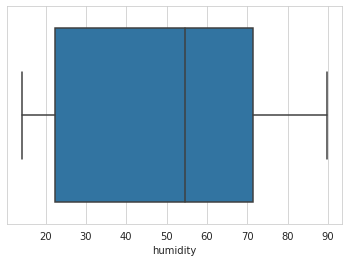

In [ ]:
sns.boxplot(df3['humidity'])

In [ ]:
import numpy as np
q25,q75=np.percentile(df3['humidity'],25),np.percentile(df3['humidity'],75)
iqr=q75-q25

In [ ]:
iqr

49.08295011

In [ ]:
cf=iqr*1.5
lr,ur=q25-cf,q75+cf

In [ ]:
cf

73.62442516499999

In [ ]:
lr

-51.19831544499999

In [ ]:
ur

145.133484995

In [ ]:
outliers=[x for x in df3['humidity'] if (x<lr) or(x>ur)]

In [ ]:
len(outliers)

0

In [ ]:
import numpy as np
c1,c2=np.percentile(df3['temperature'],25),np.percentile(df3['temperature'],75)
iqrag=c2-c1

In [ ]:
iqrag

7.590887219999999

In [ ]:
cfr=iqr*1.5
lor,uor=c1-cfr,c2+cfr

In [ ]:
cfr

73.62442516499999

In [ ]:
lor

-53.89739988499999

In [ ]:
uor

100.942337665

In [ ]:
ors=[i for i in df3['temperature'] if (i<lr) or(i>ur)]

In [ ]:
len(ors)

0

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df3[['ph']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.1, n_estimators=50)

In [ ]:
df3['scores']=model.decision_function(df3[['ph']])
df3['anomaly']=model.predict(df3[['ph']])
df3.head(10)

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,scores,anomaly
0,90,42,43,20.879744,82.002744,6.502985,ANDAMAN And NICOBAR ISLANDS,NICOBAR,165.2,540.7,1207.2,892.1,0.127890,1
1,85,58,41,21.770462,80.319644,7.038096,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,69.7,483.5,1757.2,705.3,0.113779,1
2,60,55,44,23.004459,82.320763,7.840207,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,48.6,405.6,1884.4,574.7,0.063633,1
3,74,35,40,26.491096,80.158363,6.980401,ARUNACHAL PRADESH,LOHIT,123.0,841.3,1848.5,231.0,0.120695,1
4,78,42,42,20.130175,81.604873,7.628473,ARUNACHAL PRADESH,EAST SIANG,112.8,645.4,3008.4,268.1,0.058088,1
5,69,37,42,23.058049,83.370118,7.073454,ARUNACHAL PRADESH,SUBANSIRI F.D,76.3,327.3,788.4,108.4,0.119357,1
6,69,55,38,22.708838,82.639414,5.700806,ARUNACHAL PRADESH,TIRAP,114.9,786.6,2385.5,284.5,0.167246,1
7,94,53,40,20.277744,82.894086,5.718627,ARUNACHAL PRADESH,ANJAW (LOHIT),123.0,841.3,1848.5,231.0,0.165928,1
8,89,54,38,24.515881,83.535216,6.685346,ARUNACHAL PRADESH,LOWER DIBANG,237.6,955.1,1073.4,287.2,0.116744,1
9,68,58,38,23.223974,83.033227,6.336254,ARUNACHAL PRADESH,CHANGLANG,241.2,1256.5,1632.1,414.1,0.131165,1


In [ ]:
df3.loc[df3.anomaly==-1].count()

N                64
P                64
K                64
temperature      64
humidity         64
ph               64
STATE_UT_NAME    64
DISTRICT         64
Jan-Feb          64
Mar-May          64
Jun-Sep          64
Oct-Dec          64
scores           64
anomaly          64
dtype: int64

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model=LocalOutlierFactor(novelty=True)
model.fit(df3[['N']])

LocalOutlierFactor(novelty=True)

In [ ]:
df3['scores']=model.decision_function(df3[['N']])
df3['anomaly']=model.predict(df3[['N']])
df3.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,scores,anomaly
0,90,42,43,20.879744,82.002744,6.502985,ANDAMAN And NICOBAR ISLANDS,NICOBAR,165.2,540.7,1207.2,892.1,0.500000,1
1,85,58,41,21.770462,80.319644,7.038096,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,69.7,483.5,1757.2,705.3,0.528009,1
2,60,55,44,23.004459,82.320763,7.840207,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,48.6,405.6,1884.4,574.7,0.539130,1
3,74,35,40,26.491096,80.158363,6.980401,ARUNACHAL PRADESH,LOHIT,123.0,841.3,1848.5,231.0,0.574937,1
4,78,42,42,20.130175,81.604873,7.628473,ARUNACHAL PRADESH,EAST SIANG,112.8,645.4,3008.4,268.1,0.542634,1
5,69,37,42,23.058049,83.370118,7.073454,ARUNACHAL PRADESH,SUBANSIRI F.D,76.3,327.3,788.4,108.4,0.463669,1
6,69,55,38,22.708838,82.639414,5.700806,ARUNACHAL PRADESH,TIRAP,114.9,786.6,2385.5,284.5,0.463669,1
7,94,53,40,20.277744,82.894086,5.718627,ARUNACHAL PRADESH,ANJAW (LOHIT),123.0,841.3,1848.5,231.0,0.467913,1
8,89,54,38,24.515881,83.535216,6.685346,ARUNACHAL PRADESH,LOWER DIBANG,237.6,955.1,1073.4,287.2,0.500000,1
9,68,58,38,23.223974,83.033227,6.336254,ARUNACHAL PRADESH,CHANGLANG,241.2,1256.5,1632.1,414.1,0.504198,1


In [ ]:
df3.loc[df3.anomaly==-1].count()

N                30
P                30
K                30
temperature      30
humidity         30
ph               30
STATE_UT_NAME    30
DISTRICT         30
Jan-Feb          30
Mar-May          30
Jun-Sep          30
Oct-Dec          30
scores           30
anomaly          30
dtype: int64

In [ ]:
from sklearn.covariance import EllipticEnvelope
model=EllipticEnvelope(contamination=0.01)
model.fit(df3[['temperature']])

EllipticEnvelope(contamination=0.01)

In [ ]:
df3['scores']=model.decision_function(df3[['temperature']])
df3['anomaly']=model.predict(df3[['temperature']])
df3.head(10)

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,scores,anomaly
0,90,42,43,20.879744,82.002744,6.502985,ANDAMAN And NICOBAR ISLANDS,NICOBAR,165.2,540.7,1207.2,892.1,8.582520,1
1,85,58,41,21.770462,80.319644,7.038096,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,69.7,483.5,1757.2,705.3,8.790244,1
2,60,55,44,23.004459,82.320763,7.840207,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,48.6,405.6,1884.4,574.7,8.930944,1
3,74,35,40,26.491096,80.158363,6.980401,ARUNACHAL PRADESH,LOHIT,123.0,841.3,1848.5,231.0,8.405194,1
4,78,42,42,20.130175,81.604873,7.628473,ARUNACHAL PRADESH,EAST SIANG,112.8,645.4,3008.4,268.1,8.338743,1
5,69,37,42,23.058049,83.370118,7.073454,ARUNACHAL PRADESH,SUBANSIRI F.D,76.3,327.3,788.4,108.4,8.933184,1
6,69,55,38,22.708838,82.639414,5.700806,ARUNACHAL PRADESH,TIRAP,114.9,786.6,2385.5,284.5,8.912799,1
7,94,53,40,20.277744,82.894086,5.718627,ARUNACHAL PRADESH,ANJAW (LOHIT),123.0,841.3,1848.5,231.0,8.391719,1
8,89,54,38,24.515881,83.535216,6.685346,ARUNACHAL PRADESH,LOWER DIBANG,237.6,955.1,1073.4,287.2,8.870506,1
9,68,58,38,23.223974,83.033227,6.336254,ARUNACHAL PRADESH,CHANGLANG,241.2,1256.5,1632.1,414.1,8.938075,1


In [ ]:
df3.loc[df3.anomaly==-1].count()

N                7
P                7
K                7
temperature      7
humidity         7
ph               7
STATE_UT_NAME    7
DISTRICT         7
Jan-Feb          7
Mar-May          7
Jun-Sep          7
Oct-Dec          7
scores           7
anomaly          7
dtype: int64

In [ ]:
from sklearn.svm import OneClassSVM
model=OneClassSVM(nu=0.01)
model.fit(df3[['P']])

OneClassSVM(nu=0.01)

In [ ]:
df3['scores']=model.decision_function(df3[['P']])
df3['anomaly']=model.predict(df3[['P']])
df3.head(10)

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,scores,anomaly
0,90,42,43,20.879744,82.002744,6.502985,ANDAMAN And NICOBAR ISLANDS,NICOBAR,165.2,540.7,1207.2,892.1,0.087951,1
1,85,58,41,21.770462,80.319644,7.038096,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,69.7,483.5,1757.2,705.3,0.008210,1
2,60,55,44,23.004459,82.320763,7.840207,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,48.6,405.6,1884.4,574.7,0.005634,1
3,74,35,40,26.491096,80.158363,6.980401,ARUNACHAL PRADESH,LOHIT,123.0,841.3,1848.5,231.0,-0.000184,-1
4,78,42,42,20.130175,81.604873,7.628473,ARUNACHAL PRADESH,EAST SIANG,112.8,645.4,3008.4,268.1,0.087951,1
5,69,37,42,23.058049,83.370118,7.073454,ARUNACHAL PRADESH,SUBANSIRI F.D,76.3,327.3,788.4,108.4,0.082499,1
6,69,55,38,22.708838,82.639414,5.700806,ARUNACHAL PRADESH,TIRAP,114.9,786.6,2385.5,284.5,0.005634,1
7,94,53,40,20.277744,82.894086,5.718627,ARUNACHAL PRADESH,ANJAW (LOHIT),123.0,841.3,1848.5,231.0,0.001804,1
8,89,54,38,24.515881,83.535216,6.685346,ARUNACHAL PRADESH,LOWER DIBANG,237.6,955.1,1073.4,287.2,0.003745,1
9,68,58,38,23.223974,83.033227,6.336254,ARUNACHAL PRADESH,CHANGLANG,241.2,1256.5,1632.1,414.1,0.008210,1


In [ ]:
df3.loc[df3.anomaly==-1].count()

N                45
P                45
K                45
temperature      45
humidity         45
ph               45
STATE_UT_NAME    45
DISTRICT         45
Jan-Feb          45
Mar-May          45
Jun-Sep          45
Oct-Dec          45
scores           45
anomaly          45
dtype: int64

In [ ]:
from sklearn.svm import OneClassSVM
model=OneClassSVM(nu=0.01)
model.fit(df3[['K']])

OneClassSVM(nu=0.01)

In [ ]:
df3['scores']=model.decision_function(df3[['K']])
df3['anomaly']=model.predict(df3[['K']])
df3.head(10)

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,scores,anomaly
0,90,42,43,20.879744,82.002744,6.502985,ANDAMAN And NICOBAR ISLANDS,NICOBAR,165.2,540.7,1207.2,892.1,0.030436,1
1,85,58,41,21.770462,80.319644,7.038096,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,69.7,483.5,1757.2,705.3,0.054398,1
2,60,55,44,23.004459,82.320763,7.840207,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,48.6,405.6,1884.4,574.7,0.015903,1
3,74,35,40,26.491096,80.158363,6.980401,ARUNACHAL PRADESH,LOHIT,123.0,841.3,1848.5,231.0,0.064059,1
4,78,42,42,20.130175,81.604873,7.628473,ARUNACHAL PRADESH,EAST SIANG,112.8,645.4,3008.4,268.1,0.043237,1
5,69,37,42,23.058049,83.370118,7.073454,ARUNACHAL PRADESH,SUBANSIRI F.D,76.3,327.3,788.4,108.4,0.043237,1
6,69,55,38,22.708838,82.639414,5.700806,ARUNACHAL PRADESH,TIRAP,114.9,786.6,2385.5,284.5,0.079641,1
7,94,53,40,20.277744,82.894086,5.718627,ARUNACHAL PRADESH,ANJAW (LOHIT),123.0,841.3,1848.5,231.0,0.064059,1
8,89,54,38,24.515881,83.535216,6.685346,ARUNACHAL PRADESH,LOWER DIBANG,237.6,955.1,1073.4,287.2,0.079641,1
9,68,58,38,23.223974,83.033227,6.336254,ARUNACHAL PRADESH,CHANGLANG,241.2,1256.5,1632.1,414.1,0.079641,1


In [ ]:
df3.loc[df3.anomaly==-1].count()

N                18
P                18
K                18
temperature      18
humidity         18
ph               18
STATE_UT_NAME    18
DISTRICT         18
Jan-Feb          18
Mar-May          18
Jun-Sep          18
Oct-Dec          18
scores           18
anomaly          18
dtype: int64

In [ ]:
df3.drop('scores',axis=1,inplace=True)

In [ ]:
df3.drop('anomaly',axis=1,inplace=True)

**Encoding**

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df3['STATE_UT_NAME']=label_encoder.fit_transform(df3['STATE_UT_NAME'])
df3.sample(10)

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
450,1,66,23,19.543172,56.928314,4.803564,19,DAMOH,36.7,21.8,1071.0,51.1
620,13,47,20,29.217800,87.937242,6.544502,16,TUMKUR,5.4,128.2,359.2,205.7
452,17,67,18,31.219275,56.468689,5.611511,19,SINGRAULI,23.0,16.0,832.3,49.9
191,91,55,15,18.093002,72.610242,6.376651,4,BANKA,19.4,73.3,865.9,95.9
414,27,72,17,28.980394,57.232652,6.347929,19,MANDSAUR,6.7,11.3,780.0,52.1
67,86,59,35,25.787206,82.111240,6.946636,23,LAWNGTLAI,35.8,509.4,1705.7,306.7
238,46,76,77,18.235675,19.685385,6.967843,32,CHANDAULI,30.6,27.2,846.1,45.7
405,30,75,25,30.332766,42.352499,6.446092,19,BHIND,17.5,10.1,685.5,50.3
116,70,47,17,24.612912,70.416244,6.600827,25,KEONDJHARGARH,48.0,188.4,1056.5,143.8
87,84,50,44,25.485920,81.406335,5.935344,34,DARJEELING,82.1,450.5,2440.3,145.6


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df3['DISTRICT']=label_encoder.fit_transform(df3['DISTRICT'])
df3.sample(10)

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
104,61,38,20,18.478913,62.695039,5.970458,34,426,33.4,195.2,1172.8,158.4
281,47,79,78,17.483954,14.760145,6.609697,33,103,82.8,113.1,1319.7,108.3
121,99,50,15,18.147101,71.094453,5.573286,25,565,35.6,72.0,1175.9,64.3
293,35,63,76,17.815645,17.607566,7.714153,12,181,28.8,37.2,600.2,31.4
89,91,50,40,20.824771,84.134188,6.462392,34,366,24.1,155.5,1117.3,122.5
491,4,69,19,19.251001,47.703518,5.374359,20,154,3.5,15.1,523.5,65.1
161,72,60,25,18.525108,69.027623,5.773455,15,304,47.0,87.0,1251.1,97.7
530,22,44,24,24.309351,56.329383,6.030447,6,255,40.8,63.3,1348.6,91.7
223,60,68,83,19.120652,18.434758,6.620901,32,543,30.6,35.6,864.8,72.3
550,3,58,21,25.361405,46.826528,9.160692,1,357,4.7,56.3,559.7,110.4


**Feature Selection**

In [ ]:
df3

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,90,42,43,20.879744,82.002744,6.502985,0,423,165.2,540.7,1207.2,892.1
1,85,58,41,21.770462,80.319644,7.038096,0,553,69.7,483.5,1757.2,705.3
2,60,55,44,23.004459,82.320763,7.840207,0,396,48.6,405.6,1884.4,574.7
3,74,35,40,26.491096,80.158363,6.980401,2,347,123.0,841.3,1848.5,231.0
4,78,42,42,20.130175,81.604873,7.628473,2,173,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...
636,8,50,21,28.629112,89.114806,6.218924,17,233,35.5,426.6,2276.2,564.2
637,20,40,15,29.573295,88.075055,7.199495,17,290,3.3,272.9,3007.5,337.9
638,36,43,22,27.826843,87.166791,6.389882,17,447,65.0,553.5,1715.7,624.2
639,14,57,15,29.875702,83.147963,6.623438,17,620,13.1,275.4,2632.1,332.5


In [ ]:
target

0          rice
1          rice
2          rice
3          rice
4          rice
         ...   
636    mungbean
637    mungbean
638    mungbean
639    mungbean
640    mungbean
Name: label, Length: 641, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df3[['N','P','K','temperature','humidity','ph','STATE_UT_NAME','DISTRICT','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']],target,train_size=0.8)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
X_train.columns[var_thres.get_support()]

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'STATE_UT_NAME',
       'DISTRICT', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [ ]:
constant_columns=[column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]

In [ ]:
constant_columns

[]

In [ ]:
len(constant_columns)

0

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
241,59,55,79,20.367204,16.895743,8.766129,32,532,36.8,54.4,993.8,63.6
582,19,51,25,26.804744,48.239914,3.525366,30,272,29.1,66.0,490.8,641.8
564,22,36,16,30.581395,50.771481,8.184229,30,111,36.7,58.5,439.1,789.9
615,34,60,25,29.784167,85.169070,6.793856,16,223,3.8,168.0,574.3,221.0
115,63,58,22,18.254054,55.282204,6.204748,25,269,19.8,85.1,1207.6,90.5
...,...,...,...,...,...,...,...,...,...,...,...,...
632,29,36,25,28.285115,88.439398,7.130279,17,436,9.4,279.9,1572.7,428.0
51,76,60,39,20.045414,80.347756,6.766240,22,616,50.8,574.1,2775.0,243.1
493,7,74,17,22.472532,62.565325,5.667420,20,315,1.8,90.7,1737.6,162.7
404,10,79,18,21.064368,55.469859,5.624731,19,611,22.2,10.9,1005.0,46.7


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(df3,target,test_size=0.2,random_state=41)

In [ ]:
train_features_T = train_features.T
train_features_T.shape

(12, 512)

In [ ]:
df3

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,90,42,43,20.879744,82.002744,6.502985,0,423,165.2,540.7,1207.2,892.1
1,85,58,41,21.770462,80.319644,7.038096,0,553,69.7,483.5,1757.2,705.3
2,60,55,44,23.004459,82.320763,7.840207,0,396,48.6,405.6,1884.4,574.7
3,74,35,40,26.491096,80.158363,6.980401,2,347,123.0,841.3,1848.5,231.0
4,78,42,42,20.130175,81.604873,7.628473,2,173,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...
636,8,50,21,28.629112,89.114806,6.218924,17,233,35.5,426.6,2276.2,564.2
637,20,40,15,29.573295,88.075055,7.199495,17,290,3.3,272.9,3007.5,337.9
638,36,43,22,27.826843,87.166791,6.389882,17,447,65.0,553.5,1715.7,624.2
639,14,57,15,29.875702,83.147963,6.623438,17,620,13.1,275.4,2632.1,332.5


In [ ]:
print(train_features_T.duplicated().sum())

0


In [ ]:
unique_features = train_features_T.drop_duplicates(keep='first').T

In [ ]:
unique_features.shape

(512, 12)

In [ ]:
duplicated_features = [dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
duplicated_features

[]

In [ ]:
X_train.corr()

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
N,1.000000,-0.402674,0.160224,-0.197088,0.454812,0.067318,-0.085501,0.002337,0.140422,0.463943,0.321345,0.064829
P,-0.402674,1.000000,0.248388,-0.247535,-0.628344,-0.126692,0.229857,-0.038816,0.044980,-0.331340,-0.216594,-0.401390
K,0.160224,0.248388,1.000000,-0.461481,-0.398284,0.335197,0.382199,-0.105736,0.091824,0.034896,0.014135,-0.164090
temperature,-0.197088,-0.247535,-0.461481,1.000000,0.425372,-0.013861,-0.202105,0.099245,-0.235255,0.014285,0.069662,0.316803
humidity,0.454812,-0.628344,-0.398284,0.425372,1.000000,-0.006112,-0.333498,0.068676,-0.085164,0.535347,0.405960,0.436622
ph,0.067318,-0.126692,0.335197,-0.013861,-0.006112,1.000000,0.119275,-0.003350,-0.051371,-0.015843,-0.019913,0.141733
STATE_UT_NAME,-0.085501,0.229857,0.382199,-0.202105,-0.333498,0.119275,1.000000,-0.036728,-0.090453,-0.195116,-0.131387,0.022880
DISTRICT,0.002337,-0.038816,-0.105736,0.099245,0.068676,-0.003350,-0.036728,1.000000,0.052161,0.078571,0.096444,0.149762
Jan-Feb,0.140422,0.044980,0.091824,-0.235255,-0.085164,-0.051371,-0.090453,0.052161,1.000000,0.538805,0.112961,0.182767
Mar-May,0.463943,-0.331340,0.034896,0.014285,0.535347,-0.015843,-0.195116,0.078571,0.538805,1.000000,0.558965,0.431538


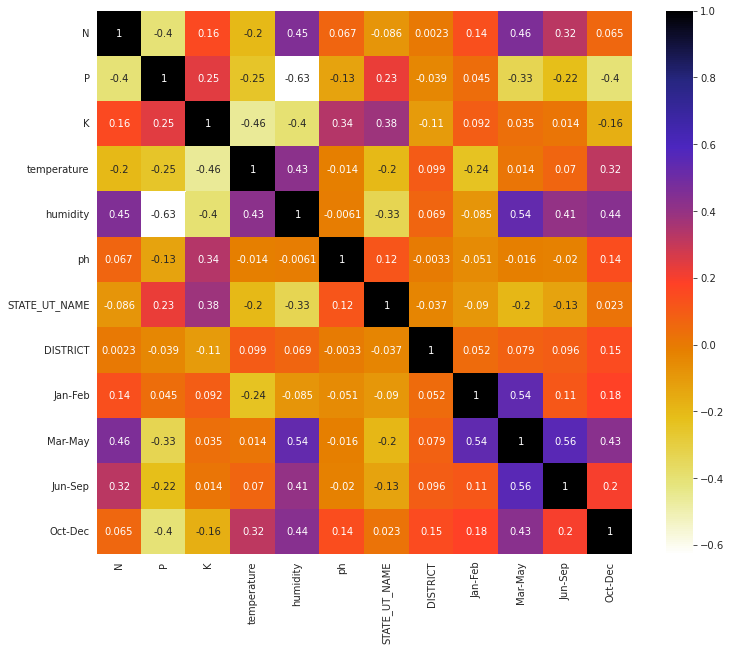

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

0

In [ ]:
corr_features

set()

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
255,56,67,78,17.574456,16.718266,8.255451,32,374,20.5,23.5,579.9,32.0
299,49,69,82,18.315615,15.361435,7.263119,12,442,36.4,32.0,521.7,34.0
150,99,36,20,20.579819,65.345839,6.671086,15,211,42.6,91.7,1197.0,90.0
222,31,78,76,17.572121,14.999275,8.519976,32,467,23.3,16.4,750.3,63.0
284,45,61,78,19.486493,16.062401,6.489389,33,34,93.0,119.6,858.4,86.3
...,...,...,...,...,...,...,...,...,...,...,...,...
221,25,68,77,20.093406,15.112796,7.701446,32,459,25.1,19.1,851.8,47.6
262,57,73,85,18.493112,14.721150,7.358100,32,522,34.4,38.0,859.2,79.2
474,9,59,24,20.435178,39.372526,4.747352,11,266,0.9,1.6,787.2,40.7
542,21,38,20,27.105080,63.567914,5.794290,1,458,16.7,77.7,382.5,329.0


**Information gain**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(X_train,y_train)

mutual_info

array([0.773, 0.489, 0.795, 0.794, 1.43 , 0.64 , 1.73 , 0.12 , 0.485,
       0.671, 0.513, 0.626])

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

STATE_UT_NAME    1.729761
humidity         1.429715
K                0.794985
temperature      0.794301
N                0.772896
Mar-May          0.671368
ph               0.639741
Oct-Dec          0.625546
Jun-Sep          0.513068
P                0.489298
Jan-Feb          0.484653
DISTRICT         0.119915
dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
sel_five=SelectKBest(mutual_info_classif,k=5)
sel_five.fit(X_train,y_train)
X_train.columns[sel_five.get_support()]

Index(['N', 'K', 'temperature', 'humidity', 'STATE_UT_NAME'], dtype='object')

**Scaling and Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols = ['N','P','K','temperature','humidity','ph','STATE_UT_NAME','DISTRICT','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']
for i in num_cols:
  scale = StandardScaler().fit(df3[[i]])
  df3[i] = scale.transform(df3[[i]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df3[['N','P','K','temperature','humidity','ph','STATE_UT_NAME','DISTRICT','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']],target,train_size=0.8)

In [ ]:
df3.shape

(641, 12)

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
38,0.638278,-1.158637,0.526836,-0.598345,1.323681,0.919472,-1.529614,-0.177323,-0.051710,0.667608,-0.223908,-0.034365
552,-1.069272,-1.482106,-0.529774,1.104687,0.510404,1.629313,-1.725144,0.479664,-0.655832,-0.488154,-0.720535,0.011323
221,-0.606811,0.863048,2.042841,-0.796129,-1.422198,1.183213,1.305564,0.772864,-0.301838,-0.647100,-0.248079,-0.639059
578,-0.962550,-0.996902,-0.437895,0.081860,0.452698,0.741872,1.110034,1.478718,-0.272161,-0.272943,-0.858249,2.041081
597,-0.322219,-0.835167,-0.713532,0.223637,-0.079906,2.034049,-0.258672,-1.024347,-0.778776,0.328147,3.727167,1.288572
...,...,...,...,...,...,...,...,...,...,...,...,...
460,-0.286645,1.429120,-0.391956,-0.068073,0.042124,-1.536866,-0.747496,0.338493,-0.793614,-0.700551,-0.559922,-0.774779
60,1.065165,-1.401239,0.251198,-0.727556,1.293559,1.082456,0.230151,-0.443376,0.295925,0.705117,-0.057252,0.373468
580,-0.784680,-0.996902,-0.759472,1.306831,0.176826,-1.660622,1.110034,1.603599,-0.236126,-0.380314,-0.953344,2.394491
6,0.958443,-0.188228,0.251198,-0.237525,1.311020,-0.666887,-1.627379,1.451569,1.601675,2.951467,2.190850,0.952631


In [ ]:
X_test

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
412,-0.393367,1.186518,-0.713532,1.040317,-0.031459,-0.544611,0.034622,-0.437946,-0.660071,-0.683672,-0.267321,-0.568511
164,1.207461,-0.754300,-0.667593,-0.966517,0.784644,-0.597372,-1.431849,-0.818021,-0.359070,-0.407977,0.021941,-0.397181
13,1.812218,-0.107361,0.159319,0.041440,1.287441,0.520079,-1.627379,1.685044,1.131096,1.821025,0.961606,0.317702
625,-0.286645,-0.996902,-0.529774,0.932793,1.309680,-0.124450,-0.258672,-1.094933,-0.691867,-0.245280,-0.947778,0.554205
43,1.420904,-1.401239,0.343078,0.002077,1.399023,-0.139155,-1.529614,-1.236103,0.039438,2.465250,2.048684,0.374812
...,...,...,...,...,...,...,...,...,...,...,...,...
603,-1.140420,-0.107361,-0.759472,0.929794,1.246507,0.375663,-0.258672,-0.579117,-0.681268,-0.444549,-0.615898,-0.081396
447,-0.500089,0.135242,-0.483835,1.513241,0.103200,0.582465,0.034622,-0.128456,-0.121661,-0.668199,0.069171,-0.679372
215,-0.500089,1.186518,2.364418,-1.087403,-1.257493,0.055325,1.305564,-0.519391,-0.170415,-0.585678,-0.349694,-0.510057
492,-0.784680,0.782181,-0.621653,-0.977411,0.011960,-0.694063,0.132387,-0.383650,-0.713064,-0.674763,-0.582026,-0.487213


In [ ]:
df3

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1.705496,-1.239504,0.480896,-0.628183,1.285250,0.074931,-1.822908,0.577397,2.667897,1.798519,0.317087,5.034990
1,1.527626,0.054374,0.389017,-0.437943,1.217125,0.569777,-1.822908,1.283251,0.643560,1.530326,1.191711,3.779913
2,0.638278,-0.188228,0.526836,-0.174386,1.298122,1.311533,-1.822908,0.430797,0.196298,1.165077,1.393988,2.902434
3,1.136313,-1.805576,0.343078,0.570289,1.210597,0.516423,-1.627379,0.164744,1.773373,3.207938,1.336899,0.593174
4,1.278609,-1.239504,0.434957,-0.788275,1.269146,1.115730,-1.627379,-0.780013,1.557161,2.289424,3.181402,0.842442
...,...,...,...,...,...,...,...,...,...,...,...,...
636,-1.211568,-0.592565,-0.529774,1.026927,1.573119,-0.187755,-0.160908,-0.454235,-0.081386,1.263540,2.017039,2.831887
637,-0.784680,-1.401239,-0.805412,1.228585,1.531034,0.719032,-0.160908,-0.144745,-0.763938,0.542889,3.179971,1.311416
638,-0.215497,-1.158637,-0.483835,0.855578,1.494271,-0.029661,-0.160908,0.707708,0.543933,1.858534,1.125717,3.235016
639,-0.998124,-0.026493,-0.805412,1.293173,1.331604,0.186321,-0.160908,1.647037,-0.556205,0.554610,2.583000,1.275135


**Machine Learning Algorithms**

1. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
y_predicted

array(['pigeonpeas', 'maize', 'rice', 'mungbean', 'rice', 'chickpea',
       'pigeonpeas', 'rice', 'kidneybeans', 'mothbeans', 'mothbeans',
       'pigeonpeas', 'kidneybeans', 'kidneybeans', 'chickpea', 'chickpea',
       'pigeonpeas', 'maize', 'mungbean', 'maize', 'rice', 'kidneybeans',
       'kidneybeans', 'chickpea', 'pigeonpeas', 'chickpea', 'chickpea',
       'mothbeans', 'kidneybeans', 'chickpea', 'chickpea', 'maize',
       'pigeonpeas', 'kidneybeans', 'chickpea', 'mothbeans', 'maize',
       'rice', 'maize', 'maize', 'kidneybeans', 'chickpea', 'pigeonpeas',
       'maize', 'rice', 'maize', 'kidneybeans', 'maize', 'kidneybeans',
       'maize', 'maize', 'chickpea', 'maize', 'mothbeans', 'mothbeans',
       'pigeonpeas', 'rice', 'rice', 'mungbean', 'rice', 'mungbean',
       'kidneybeans', 'pigeonpeas', 'rice', 'rice', 'kidneybeans',
       'kidneybeans', 'pigeonpeas', 'chickpea', 'chickpea', 'mothbeans',
       'maize', 'kidneybeans', 'chickpea', 'mothbeans', 'chickpea',
      

In [ ]:
y_test

412     pigeonpeas
164          maize
13            rice
625       mungbean
43            rice
          ...     
603       mungbean
447     pigeonpeas
215       chickpea
492     pigeonpeas
336    kidneybeans
Name: label, Length: 129, dtype: object

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
38,0.638278,-1.158637,0.526836,-0.598345,1.323681,0.919472,-1.529614,-0.177323,-0.051710,0.667608,-0.223908,-0.034365
552,-1.069272,-1.482106,-0.529774,1.104687,0.510404,1.629313,-1.725144,0.479664,-0.655832,-0.488154,-0.720535,0.011323
221,-0.606811,0.863048,2.042841,-0.796129,-1.422198,1.183213,1.305564,0.772864,-0.301838,-0.647100,-0.248079,-0.639059
578,-0.962550,-0.996902,-0.437895,0.081860,0.452698,0.741872,1.110034,1.478718,-0.272161,-0.272943,-0.858249,2.041081
597,-0.322219,-0.835167,-0.713532,0.223637,-0.079906,2.034049,-0.258672,-1.024347,-0.778776,0.328147,3.727167,1.288572
...,...,...,...,...,...,...,...,...,...,...,...,...
460,-0.286645,1.429120,-0.391956,-0.068073,0.042124,-1.536866,-0.747496,0.338493,-0.793614,-0.700551,-0.559922,-0.774779
60,1.065165,-1.401239,0.251198,-0.727556,1.293559,1.082456,0.230151,-0.443376,0.295925,0.705117,-0.057252,0.373468
580,-0.784680,-0.996902,-0.759472,1.306831,0.176826,-1.660622,1.110034,1.603599,-0.236126,-0.380314,-0.953344,2.394491
6,0.958443,-0.188228,0.251198,-0.237525,1.311020,-0.666887,-1.627379,1.451569,1.601675,2.951467,2.190850,0.952631


In [ ]:
X_test

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
412,-0.393367,1.186518,-0.713532,1.040317,-0.031459,-0.544611,0.034622,-0.437946,-0.660071,-0.683672,-0.267321,-0.568511
164,1.207461,-0.754300,-0.667593,-0.966517,0.784644,-0.597372,-1.431849,-0.818021,-0.359070,-0.407977,0.021941,-0.397181
13,1.812218,-0.107361,0.159319,0.041440,1.287441,0.520079,-1.627379,1.685044,1.131096,1.821025,0.961606,0.317702
625,-0.286645,-0.996902,-0.529774,0.932793,1.309680,-0.124450,-0.258672,-1.094933,-0.691867,-0.245280,-0.947778,0.554205
43,1.420904,-1.401239,0.343078,0.002077,1.399023,-0.139155,-1.529614,-1.236103,0.039438,2.465250,2.048684,0.374812
...,...,...,...,...,...,...,...,...,...,...,...,...
603,-1.140420,-0.107361,-0.759472,0.929794,1.246507,0.375663,-0.258672,-0.579117,-0.681268,-0.444549,-0.615898,-0.081396
447,-0.500089,0.135242,-0.483835,1.513241,0.103200,0.582465,0.034622,-0.128456,-0.121661,-0.668199,0.069171,-0.679372
215,-0.500089,1.186518,2.364418,-1.087403,-1.257493,0.055325,1.305564,-0.519391,-0.170415,-0.585678,-0.349694,-0.510057
492,-0.784680,0.782181,-0.621653,-0.977411,0.011960,-0.694063,0.132387,-0.383650,-0.713064,-0.674763,-0.582026,-0.487213


In [ ]:
model.predict_proba(X_test)

array([[4.603e-04, 5.828e-03, 1.939e-03, 6.658e-03, 3.826e-04, 9.847e-01,
        3.010e-05],
       [1.188e-04, 3.588e-05, 9.925e-01, 1.845e-03, 6.862e-04, 5.666e-04,
        4.295e-03],
       [3.515e-05, 4.903e-08, 1.864e-02, 2.076e-05, 3.750e-04, 9.514e-07,
        9.809e-01],
       [1.073e-04, 1.853e-05, 1.071e-02, 1.930e-01, 7.905e-01, 1.499e-03,
        4.228e-03],
       [2.647e-06, 2.637e-10, 1.714e-03, 1.625e-05, 3.190e-03, 7.192e-08,
        9.951e-01],
       [9.933e-01, 4.935e-03, 6.902e-07, 1.223e-04, 2.214e-08, 1.505e-03,
        1.672e-04],
       [6.780e-05, 1.066e-06, 3.115e-03, 3.395e-04, 1.347e-04, 9.962e-01,
        1.476e-04],
       [3.007e-03, 1.288e-05, 1.684e-01, 5.981e-03, 3.631e-02, 3.565e-04,
        7.859e-01],
       [1.980e-04, 9.989e-01, 7.077e-05, 7.537e-04, 5.997e-08, 4.039e-05,
        1.314e-06],
       [1.523e-02, 8.439e-03, 2.393e-03, 9.486e-01, 7.440e-03, 1.706e-02,
        7.982e-04],
       [5.586e-04, 1.992e-04, 5.191e-03, 8.932e-01, 9.634e-0

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
model.coef_

array([[ 0.123,  0.489,  2.099, -0.676, -0.974,  0.502,  0.507, -0.02 ,
         0.241, -0.068, -0.106, -0.205],
       [-0.444,  0.668, -1.444, -0.676, -3.261, -0.046,  0.615,  0.007,
         0.79 ,  0.198, -1.525, -1.015],
       [ 2.355, -0.666, -1.586, -0.631,  0.167, -0.262, -0.273,  0.155,
         0.155, -0.533,  0.271, -0.006],
       [-1.305, -1.246, -0.038,  0.725, -0.811, -0.043, -0.69 ,  0.059,
        -0.01 , -0.817, -0.04 ,  1.405],
       [-1.204, -0.679, -0.302,  0.855,  3.158,  0.026, -0.393, -0.218,
        -0.765,  0.765,  0.109,  0.954],
       [-0.881,  1.787, -0.658,  0.647,  0.023, -0.475,  0.156,  0.04 ,
        -0.77 , -1.254,  0.842, -1.36 ],
       [ 1.355, -0.353,  1.929, -0.245,  1.698,  0.298,  0.077, -0.023,
         0.358,  1.709,  0.447,  0.227]])

In [ ]:
model.intercept_

array([ 0.225, -0.86 ,  0.798,  1.45 , -1.966,  0.27 ,  0.083])

In [ ]:
from sklearn.metrics import confusion_matrix
cma=confusion_matrix(y_test,y_predicted)
cma

array([[21,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0, 25]])

Text(42.0, 0.5, 'Truth')

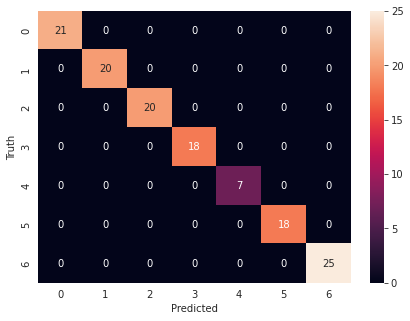

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cma, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

    chickpea       1.00      1.00      1.00        21
 kidneybeans       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00         7
  pigeonpeas       1.00      1.00      1.00        18
        rice       1.00      1.00      1.00        25

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129



**Result : Accuracy of the Logistic Regression model is 1.00**

2. Decision tree

In [ ]:
P=df3.iloc[:,0:22]

In [ ]:
X=P.drop('label',axis=1)

In [ ]:
y=P['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=31)

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
264,52,73,79,17.257695,18.749440,7.840339,32,188,13.3,10.9,7.5,3.8,10.3,59.5,216.9,258.1,141.8,35.5,2.9,5.0,765.5
107,89,60,19,25.191924,66.690290,5.913665,34,626,12.2,24.1,39.0,56.8,107.6,243.8,329.5,316.0,276.8,106.5,17.9,5.3,1535.5
603,10,56,16,28.174327,81.045548,6.828187,16,210,4.3,2.9,6.2,19.7,36.4,112.8,156.1,167.6,184.0,105.3,20.8,4.5,820.6
171,62,48,20,21.701814,60.474705,6.708447,4,208,14.9,10.5,7.0,12.5,31.6,155.4,309.8,304.3,220.4,55.9,6.0,7.2,1135.5
318,10,55,23,21.188532,19.634386,5.728233,27,187,15.7,14.5,21.3,9.3,15.4,31.3,128.4,124.7,67.9,12.3,5.1,9.7,455.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,24,55,78,17.302879,15.154059,6.649196,32,260,14.1,10.5,5.3,4.7,8.7,79.0,271.8,309.9,177.2,37.2,6.6,6.5,931.5
28,60,49,44,20.775761,84.497744,6.244841,3,153,10.3,11.7,46.6,147.5,391.6,603.0,554.7,418.7,340.1,155.1,19.2,4.1,2702.6
610,28,35,22,29.530376,86.733460,7.156563,16,45,1.7,5.8,7.6,36.2,93.1,71.2,91.7,118.1,170.9,171.8,55.4,13.5,837.0
16,85,38,41,21.587118,82.788371,6.249051,2,170,49.0,74.4,96.5,156.9,208.0,345.7,368.5,256.2,275.9,138.2,34.4,27.2,2030.9


In [ ]:
df3['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean'], dtype=object)

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_test,y_test)

1.0

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chickpea       1.00      1.00      1.00        34
 kidneybeans       1.00      1.00      1.00        24
       maize       1.00      1.00      1.00        36
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        12
  pigeonpeas       1.00      1.00      1.00        28
        rice       1.00      1.00      1.00        35

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



**Result : Accuracy of the Decision tree model is 1.00**

In [ ]:
!pip install pydotplus

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
X.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'STATE_UT_NAME',
       'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL'],
      dtype='object')

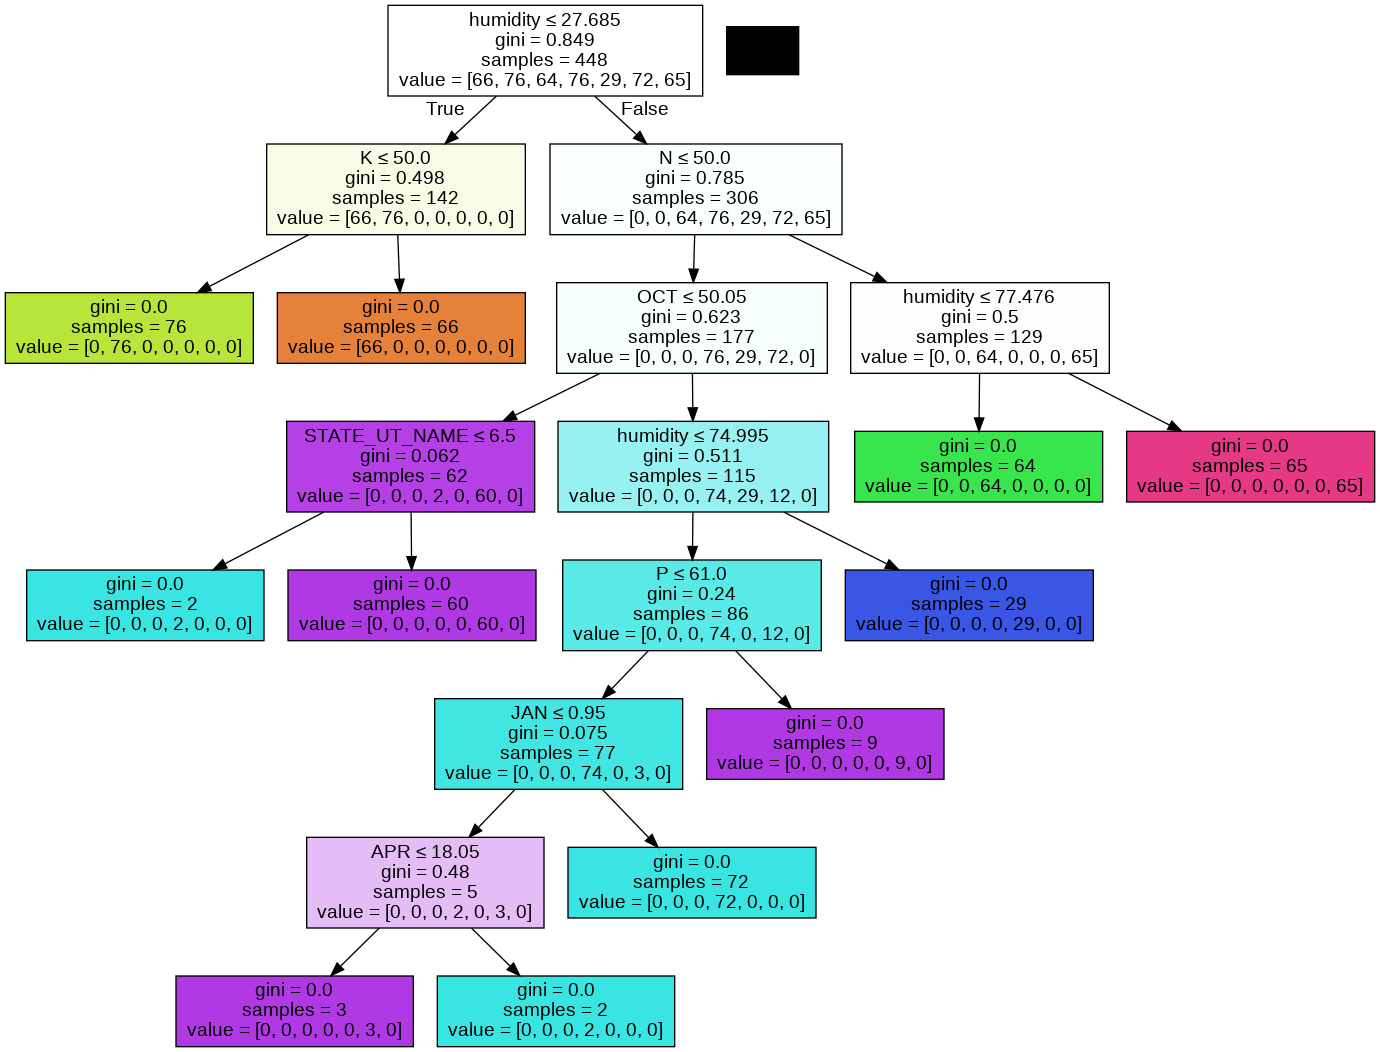

In [ ]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=False,special_characters=True,feature_names=X.columns)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

3. Random Forest

In [ ]:
df=df3

In [ ]:
X=df3.drop('label',axis=1)
y=df3['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((448, 25), (193, 25))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifer_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

In [ ]:
classifer_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
classifer_rf.oob_score_

0.9866071428571429

In [ ]:
classifer_rf.score(X_test,y_test)

0.9948186528497409

In [ ]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [ ]:
params={'max_depth':[2,3,5,10,20],
        'min_samples_leaf':[5,10,20,50,100,200],
        'n_estimators':[10,25,30,50,100,200]}

In [ ]:
!pip install  scikit-learn

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,verbose=1,n_jobs=1,scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.984375

In [ ]:
rf_best=grid_search.best_estimator_

In [ ]:
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
rf_best.feature_importances_

array([0.117, 0.056, 0.153, 0.045, 0.193, 0.032, 0.034, 0.001, 0.012,
       0.01 , 0.025, 0.05 , 0.047, 0.018, 0.009, 0.009, 0.023, 0.051,
       0.011, 0.005, 0.01 , 0.013, 0.041, 0.012, 0.024])

In [ ]:
imp_df=pd.DataFrame({"Varname":X_train.columns,"Imp":rf_best.feature_importances_})
imp_df.sort_values(by="Imp",ascending=False)

,Varname,Imp
4,humidity,0.192999
2,K,0.153143
0,N,0.117396
1,P,0.056067
17,OCT,0.050827
11,APR,0.049876
12,MAY,0.046682
3,temperature,0.045410
22,Mar-May,0.041026
6,STATE_UT_NAME,0.034255


In [ ]:
from sklearn.metrics import  confusion_matrix
y_pred=rf_best.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

Text(69.0, 0.5, 'Truth')

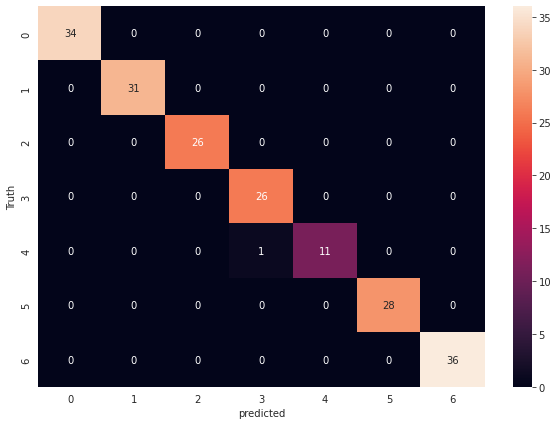

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    chickpea       1.00      1.00      1.00        34
 kidneybeans       1.00      1.00      1.00        31
       maize       1.00      1.00      1.00        26
   mothbeans       0.96      1.00      0.98        26
    mungbean       1.00      0.92      0.96        12
  pigeonpeas       1.00      1.00      1.00        28
        rice       1.00      1.00      1.00        36

    accuracy                           0.99       193
   macro avg       0.99      0.99      0.99       193
weighted avg       1.00      0.99      0.99       193



**Result : Accuracy of the Decision tree model is 0.99**

In [ ]:
!pip install pydotplus

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
X.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'STATE_UT_NAME',
       'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
       'Oct-Dec'],
      dtype='object')

4. K-Nearest Neighbour

In [ ]:
P=df3.iloc[:,0:22]
X=P.drop('label',axis=1)
y=P['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=31)

In [ ]:
df3['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean'], dtype=object)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance',algorithm = 'auto',metric = 'minkowski',p=2)

In [ ]:
Knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
acc=Knn.score(X_test, y_test)
print("The accuracy of KNN is :",acc)

The accuracy of KNN is : 0.7668393782383419


In [ ]:
y_pred = Knn.predict(X_test)
y_pred

array(['pigeonpeas', 'pigeonpeas', 'chickpea', 'kidneybeans', 'maize',
       'mothbeans', 'kidneybeans', 'maize', 'maize', 'mothbeans',
       'chickpea', 'rice', 'maize', 'rice', 'maize', 'kidneybeans',
       'pigeonpeas', 'mothbeans', 'pigeonpeas', 'chickpea', 'pigeonpeas',
       'kidneybeans', 'pigeonpeas', 'chickpea', 'mothbeans',
       'kidneybeans', 'mothbeans', 'maize', 'maize', 'chickpea',
       'mothbeans', 'maize', 'kidneybeans', 'mothbeans', 'pigeonpeas',
       'maize', 'kidneybeans', 'pigeonpeas', 'pigeonpeas', 'kidneybeans',
       'chickpea', 'chickpea', 'maize', 'kidneybeans', 'chickpea',
       'maize', 'kidneybeans', 'rice', 'rice', 'kidneybeans', 'mothbeans',
       'maize', 'kidneybeans', 'mothbeans', 'chickpea', 'pigeonpeas',
       'mungbean', 'chickpea', 'chickpea', 'pigeonpeas', 'maize',
       'kidneybeans', 'maize', 'rice', 'chickpea', 'pigeonpeas', 'maize',
       'pigeonpeas', 'kidneybeans', 'rice', 'mothbeans', 'mungbean',
       'pigeonpeas', 'rice', 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  5,  3,  2,  0,  0,  0],
       [ 5, 17,  1,  0,  0,  1,  0],
       [ 0,  0, 31,  1,  0,  2,  2],
       [ 1,  0,  3, 17,  0,  3,  0],
       [ 0,  0,  0,  2,  6,  0,  4],
       [ 1,  4,  0,  1,  1, 21,  0],
       [ 0,  0,  3,  0,  0,  0, 32]])

Text(69.0, 0.5, 'Truth')

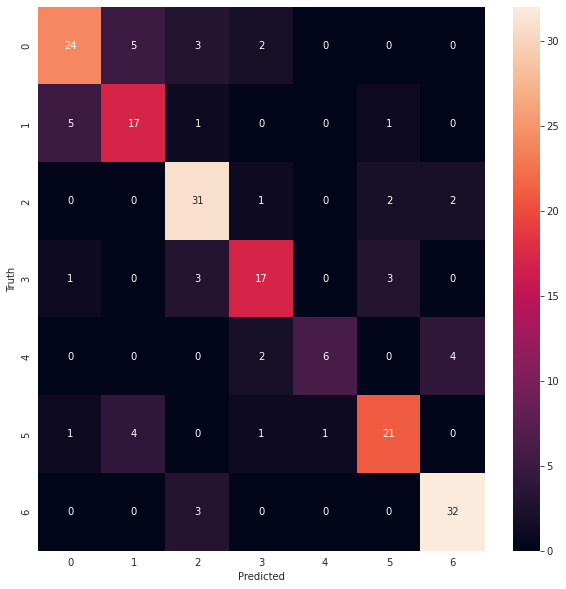

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chickpea       0.77      0.71      0.74        34
 kidneybeans       0.65      0.71      0.68        24
       maize       0.76      0.86      0.81        36
   mothbeans       0.74      0.71      0.72        24
    mungbean       0.86      0.50      0.63        12
  pigeonpeas       0.78      0.75      0.76        28
        rice       0.84      0.91      0.88        35

    accuracy                           0.77       193
   macro avg       0.77      0.74      0.75       193
weighted avg       0.77      0.77      0.76       193



**Result : Accuracy of the K-Nearest Neighbour is 0.77**